In [1]:
from binance.client import Client
import websocket
import datetime
import json
import uuid
import sqlite3
import time
import timeit
import pandas as pd
import numpy as np
import database as db
import ast
import sys
from functools import reduce
import warnings 
import config
import matplotlib.pyplot as plt
warnings.simplefilter("ignore")
import itertools
from tqdm import tnrange, notebook
from datetime import timedelta, datetime

In [2]:
# Drawing data from database and binance

def get_latest_symbol_list_db(raw_data_schema = 'cmc_raw_data'):
    table_list = db.get_all_table_list(raw_data_schema)
    table_list = [eval(i) for i in table_list]
    table_list.sort()
    # Get latest date
    date = table_list[-1]
    
    # Draw the data for the latest date
    df = db.get_db_data(raw_data_schema, str(date))
    final_list = list(df['Symbol'])
    return final_list

def get_historical_price(symbol):
    client = Client(config.binance_api_key_usdm_read, config.binance_secret_key_usdm_read)
    # set the time interval
    interval = Client.KLINE_INTERVAL_1HOUR
    klines = client.get_historical_klines(symbol, interval, "1 Jan, 2021")
    df = pd.DataFrame(klines, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
    df = df[['timestamp', 'open', 'high', 'low', 'close', 'volume']]
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    df['close'] = pd.to_numeric(df['close'])
    df = df.dropna()
    
    return df

def get_final_price_series(symbol_list):
    final_list = []
    
    # Use BTCUSDT as benchmark to store see what the length of the timeseries should be
    df_btc = get_historical_price('BTCUSDT')
    benchmark_length = len(df_btc)
    print(benchmark_length)
    for symbol in symbol_list:
        print(symbol)
        try:
            df = get_historical_price(symbol+'USDT')
            time.sleep(5)
            if len(df) != benchmark_length:
                pass
            else:
                df_close = df[['close']]
                df_close.rename(columns = {'close':f'{symbol}'}, inplace=True)
                final_list.append(df_close)
        except Exception as e:
            print(e)
    return final_list

In [3]:
symbol_list = get_latest_symbol_list_db()
final_symbol_list = get_final_price_series(symbol_list)

df_final_time_series = pd.concat(final_symbol_list,axis=1)


22457
BTC
ETH
XRP
BNB
ADA
DOGE
SOL
TRX
MATIC
LTC
DOT
TON
APIError(code=-1121): Invalid symbol.
BCH
AVAX
SHIB
LINK
XLM
LEO
APIError(code=-1121): Invalid symbol.
UNI
XMR
ETC
OKB
APIError(code=-1121): Invalid symbol.
FIL
ICP
LDO
HBAR
APT
ARB
CRO
APIError(code=-1121): Invalid symbol.
NEAR
QNT
OP
GRT
MKR
BIT
APIError(code=-1121): Invalid symbol.
AAVE
ALGO
SAND
STX
EGLD
EOS
IMX


In [4]:
pd.set_option('display.max_columns', None)
df_final_time_series

BTC      ETH      XRP       BNB      ADA      DOGE  \
timestamp                                                                      
2021-01-01 00:00:00  28995.13   734.07  0.22162   37.3764  0.18051  0.004679   
2021-01-01 01:00:00  29409.99   748.28  0.22382   37.6134  0.18358  0.004737   
2021-01-01 02:00:00  29194.65   744.06  0.22361   37.9600  0.18368  0.004755   
2021-01-01 03:00:00  29278.40   744.82  0.22730   37.9250  0.18292  0.004978   
2021-01-01 04:00:00  29220.31   742.29  0.23898   37.8702  0.18180  0.004894   
...                       ...      ...      ...       ...      ...       ...   
2023-07-26 02:00:00  29288.57  1859.71  0.71130  237.9000  0.30370  0.079720   
2023-07-26 03:00:00  29242.81  1858.70  0.71120  238.4000  0.30350  0.080270   
2023-07-26 04:00:00  29201.19  1855.04  0.70580  238.1000  0.30190  0.080170   
2023-07-26 05:00:00  29268.12  1859.37  0.70810  238.4000  0.30330  0.080280   
2023-07-26 06:00:00  29260.01  1858.85  0.70620  238.4000  0.30290  0.080140   

                         SOL      TRX    MATIC     LTC     DOT     BCH  \
timestamp                                                                
2021-01-01 00:00:00   1.5442  0.02680  0.01782  123.87  9.2609  341.44   
2021-01-01 01:00:00   1.5734  0.02719  0.01802  131.70  9.2432  349.71   
2021-01-01 02:00:00   1.5872  0.02728  0.01794  133.33  9.0809  354.37   
2021-01-01 03:00:00   1.6029  0.02716  0.01815  131.66  9.1177  350.95   
2021-01-01 04:00:00   1.6022  0.02705  0.01809  130.87  9.0600  348.21   
...                      ...      ...      ...     ...     ...     ...   
2023-07-26 02:00:00  23.5300  0.08174  0.70450   89.86  5.1820  236.90   
2023-07-26 03:00:00  23.5200  0.08194  0.70420   89.63  5.1780  237.80   
2023-07-26 04:00:00  23.4100  0.08181  0.70170   89.54  5.1810  237.00   
2023-07-26 05:00:00  23.5600  0.08188  0.70720   89.77  5.2080  238.10   
2023-07-26 06:00:00  23.5000  0.08183  0.70640   89.67  5.1930  238.00   

                        AVAX     LINK      XLM     UNI     XMR      ETC  \
timestamp                                                                 
2021-01-01 00:00:00   3.2461  11.2812  0.12879  5.2241  156.92   5.6971   
2021-01-01 01:00:00   3.1709  11.4735  0.13304  5.1663  160.01   5.7431   
2021-01-01 02:00:00   3.0891  11.5773  0.13272  5.1846  161.32   5.7737   
2021-01-01 03:00:00   3.1085  11.5006  0.13084  5.1548  159.75   5.7431   
2021-01-01 04:00:00   3.0901  11.4575  0.13340  5.1118  159.88   5.7838   
...                      ...      ...      ...     ...     ...      ...   
2023-07-26 02:00:00  13.2600   7.4050  0.14380  5.8450  162.30  18.0700   
2023-07-26 03:00:00  13.2600   7.4520  0.14470  5.8220  162.80  18.0900   
2023-07-26 04:00:00  13.2000   7.4610  0.14270  5.7890  162.80  18.0600   
2023-07-26 05:00:00  13.2800   7.4870  0.14400  5.8300  162.90  18.1100   
2023-07-26 06:00:00  13.2700   7.4810  0.14400  5.8350  162.90  18.1100   

                         FIL     HBAR    NEAR      GRT      MKR    AAVE  \
timestamp                                                                 
2021-01-01 00:00:00  24.9659  0.03198  1.4517  0.35111   596.53  88.097   
2021-01-01 01:00:00  23.8511  0.03208  1.4765  0.36940   597.02  87.422   
2021-01-01 02:00:00  24.2403  0.03215  1.4873  0.36175   596.36  87.882   
2021-01-01 03:00:00  24.2307  0.03222  1.4450  0.36629   597.03  88.454   
2021-01-01 04:00:00  23.7348  0.03327  1.4468  0.36145   592.94  87.431   
...                      ...      ...     ...      ...      ...     ...   
2023-07-26 02:00:00   4.3810  0.05220  1.3340  0.10920  1125.00  69.880   
2023-07-26 03:00:00   4.3700  0.05210  1.3350  0.10950  1133.00  70.670   
2023-07-26 04:00:00   4.3490  0.05180  1.3280  0.10910  1127.00  69.990   
2023-07-26 05:00:00   4.3730  0.05190  1.3370  0.10990  1138.00  70.650   
2023-07-26 06:00:00   4.3740  0.05200  1.3380  0.11000  1139.00  70.510   

                       ALGO      SAND     STX    EGLD     EOS  
timest

In [5]:
subset_df = df_final_time_series.iloc[:, :6] 
subset_df

BTC      ETH       BNB      XRP      ADA      DOGE
timestamp                                                                   
2021-01-01 00:00:00  28995.13   734.07   37.3764  0.22162  0.18051  0.004679
2021-01-01 01:00:00  29409.99   748.28   37.6134  0.22382  0.18358  0.004737
2021-01-01 02:00:00  29194.65   744.06   37.9600  0.22361  0.18368  0.004755
2021-01-01 03:00:00  29278.40   744.82   37.9250  0.22730  0.18292  0.004978
2021-01-01 04:00:00  29220.31   742.29   37.8702  0.23898  0.18180  0.004894
...                       ...      ...       ...      ...      ...       ...
2023-07-09 21:00:00  30153.90  1865.25  234.2000  0.46810  0.28420  0.065500
2023-07-09 22:00:00  30174.00  1866.72  234.3000  0.46880  0.28540  0.065570
2023-07-09 23:00:00  30160.71  1862.80  234.1000  0.46800  0.28440  0.065360
2023-07-10 00:00:00  30090.27  1854.52  233.3000  0.46580  0.28080  0.064430
2023-07-10 01:00:00  30103.33  1856.00  233.1000  0.46410  0.28060  0.064530

[22068 rows x 6 columns]

# Log prices of all coins

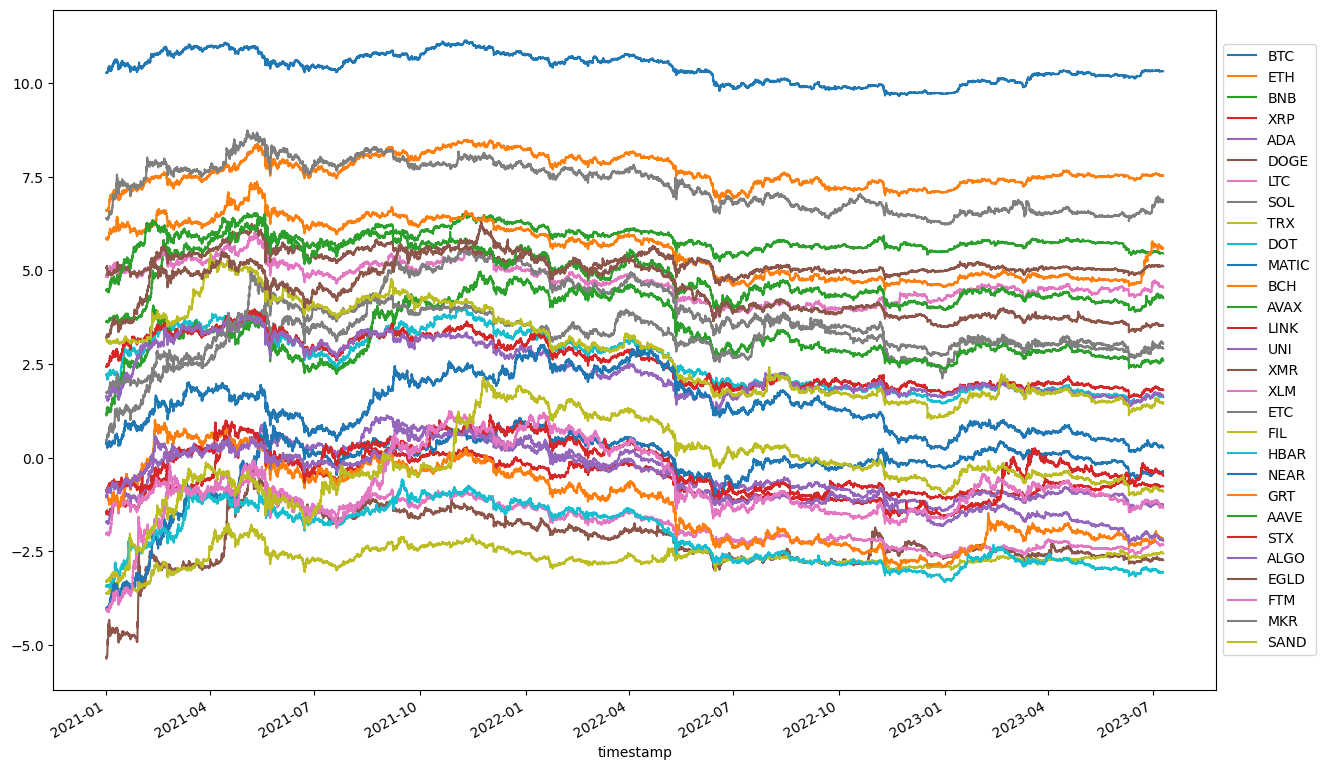

In [6]:
log_df_time_series = np.log(df_final_time_series)

ax = log_df_time_series.plot(figsize = (15,10))

# Customize the legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

# ADFuller test for non-stationarity

Find non-stationary coins to fulfill the cointegration property requirement

In [122]:
from statsmodels.tsa.stattools import adfuller

In [123]:
non_stationary = []
for i in df_final_time_series.columns:
    if adfuller(df_final_time_series[i])[1]> 0.01:
        non_stationary.append(i)
non_stationary

['BTC',
 'ETH',
 'BNB',
 'XRP',
 'ADA',
 'DOGE',
 'LTC',
 'SOL',
 'TRX',
 'DOT',
 'MATIC',
 'BCH',
 'AVAX',
 'LINK',
 'UNI',
 'XMR',
 'XLM',
 'ETC',
 'FIL',
 'HBAR',
 'NEAR',
 'GRT',
 'AAVE',
 'STX',
 'ALGO',
 'EGLD',
 'FTM',
 'MKR',
 'SAND']

# Correlation matrix for all coin pairs

In [5]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

def find_cointegrated_pairs(data, conf=0.05):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < conf:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

def find_cointegrated_pairs_v2(data):
    n = data.shape[1]
    keys = data.keys()

    pairs = []
    scores = []
    pvalues = []
    for i in range(n):
        for j in range(i+1, n):
            try:
                S1 = data[keys[i]]
                S2 = data[keys[j]]
                result = coint(S1, S2)
                scores.append(result[0])
                pvalues.append(result[1])
                pairs.append((keys[i], keys[j]))
            except ValueError as error:
                print(error)
                pass
                      
    return scores, pvalues, pairs

def search_coint_pairs_v2(prices_df, conf=0.05):
    
    scores, pvalues, pairs = find_cointegrated_pairs_v2(prices_df)
    coint_pairs = pd.DataFrame(list(zip(scores, pvalues, pairs)), 
                               columns=['scores','pvalues','pairs'])

    return coint_pairs.sort_values('pvalues')

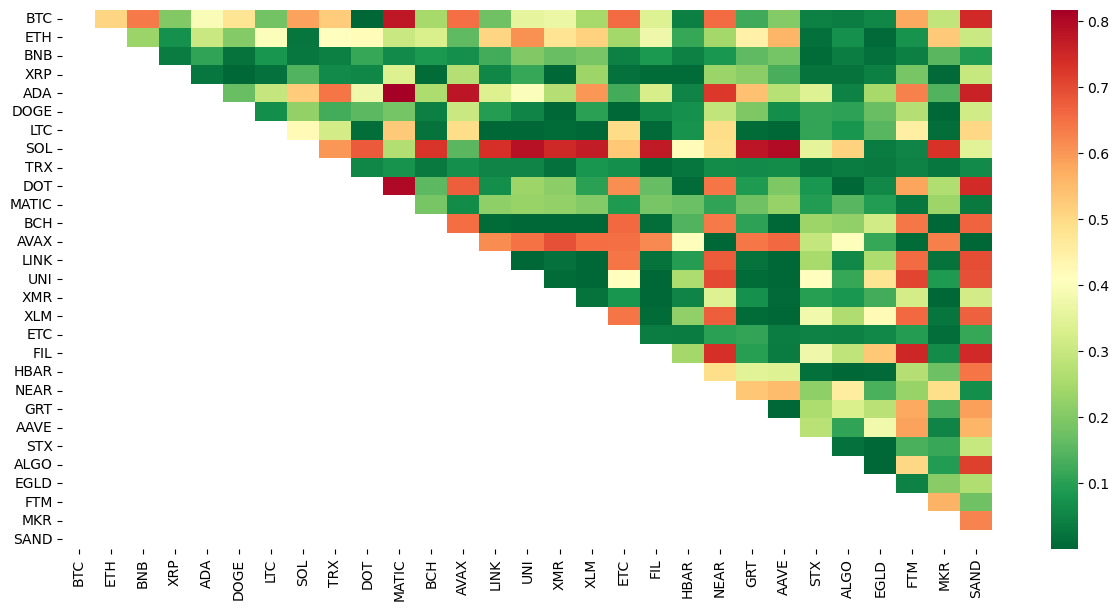

[('BTC', 'DOT'), ('BTC', 'HBAR'), ('BTC', 'STX'), ('BTC', 'ALGO'), ('ETH', 'SOL'), ('ETH', 'STX'), ('ETH', 'EGLD'), ('BNB', 'XRP'), ('BNB', 'DOGE'), ('BNB', 'SOL'), ('BNB', 'TRX'), ('BNB', 'ETC'), ('BNB', 'HBAR'), ('BNB', 'STX'), ('BNB', 'ALGO'), ('BNB', 'EGLD'), ('BNB', 'FTM'), ('XRP', 'ADA'), ('XRP', 'DOGE'), ('XRP', 'LTC'), ('XRP', 'BCH'), ('XRP', 'XMR'), ('XRP', 'ETC'), ('XRP', 'FIL'), ('XRP', 'HBAR'), ('XRP', 'STX'), ('XRP', 'ALGO'), ('XRP', 'EGLD'), ('XRP', 'MKR'), ('ADA', 'HBAR'), ('ADA', 'ALGO'), ('DOGE', 'BCH'), ('DOGE', 'UNI'), ('DOGE', 'XMR'), ('DOGE', 'ETC'), ('DOGE', 'MKR'), ('LTC', 'DOT'), ('LTC', 'BCH'), ('LTC', 'LINK'), ('LTC', 'UNI'), ('LTC', 'XMR'), ('LTC', 'XLM'), ('LTC', 'FIL'), ('LTC', 'GRT'), ('LTC', 'AAVE'), ('LTC', 'MKR'), ('SOL', 'EGLD'), ('SOL', 'FTM'), ('TRX', 'BCH'), ('TRX', 'LINK'), ('TRX', 'UNI'), ('TRX', 'XMR'), ('TRX', 'FIL'), ('TRX', 'HBAR'), ('TRX', 'STX'), ('TRX', 'ALGO'), ('TRX', 'EGLD'), ('TRX', 'FTM'), ('TRX', 'MKR'), ('DOT', 'HBAR'), ('DOT', 'ALGO

In [10]:
import seaborn as sns

# Heatmap to show the p-values of the cointegration test
# between each pair of stocks
# cell takes a while to run

scores, pvalues, pairs = find_cointegrated_pairs(df_final_time_series)
m = [0,0.2,0.4,0.6,0.8,1]

plt.figure(figsize=(15,7))

sns.heatmap(pvalues, xticklabels=df_final_time_series.columns, 
                yticklabels=df_final_time_series.columns, cmap='RdYlGn_r', 
                mask = (pvalues >= 0.95))

plt.show()
print(pairs)

In [11]:
# cointegrated pairs have p-values close to zero (look for green entries)

In [6]:
# cell takes a while to run

top_pairs = search_coint_pairs_v2(df_final_time_series, 0.05)
top_pairs.head()

scores       pvalues        pairs
286 -6.128129  8.547273e-07  (LINK, XLM)
309 -5.764913  5.128152e-06  (XLM, AAVE)
390 -5.596288  1.143784e-05   (MKR, EOS)
263 -5.590561  1.174961e-05   (BCH, MKR)
395 -5.278434  4.906009e-05  (AAVE, EOS)

In [7]:
top_pairs

scores       pvalues         pairs
286 -6.128129  8.547273e-07   (LINK, XLM)
309 -5.764913  5.128152e-06   (XLM, AAVE)
390 -5.596288  1.143784e-05    (MKR, EOS)
263 -5.590561  1.174961e-05    (BCH, MKR)
395 -5.278434  4.906009e-05   (AAVE, EOS)
..        ...           ...           ...
167 -1.471165  7.720820e-01    (SOL, GRT)
113 -1.465399  7.742197e-01   (ADA, AVAX)
161 -1.444931  7.816980e-01    (SOL, UNI)
169 -1.421084  7.901948e-01   (SOL, AAVE)
109 -1.357766  8.116230e-01  (ADA, MATIC)

[406 rows x 3 columns]

In [8]:
top_pairs['pairs'].iloc[0]

('LINK', 'XLM')

In [13]:
# BEST pair

num = 0

# P1 = top_pairs.iloc[num].pairs[0]
# P2 = top_pairs.iloc[num].pairs[1]

# Coin 1: LINK vs Coin 2: XLM

P1 = "LINK"
P2 = "XLM"

print('Coin 1: {} vs Coin 2: {}'.format(P1, P2))

Coin 1: LINK vs Coin 2: XLM


# Clustering of cointegrated pairs

<Axes: xlabel='LINK', ylabel='XLM'>

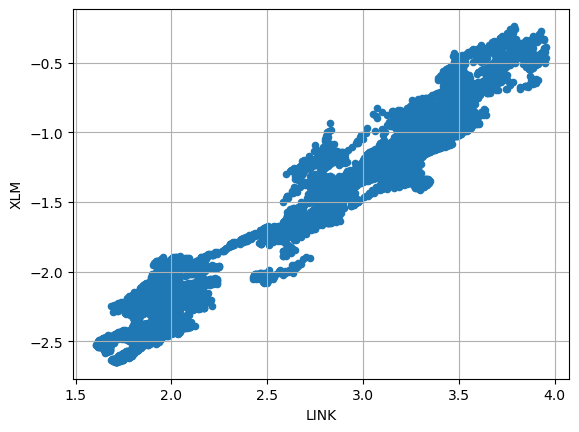

In [7]:
log_df_time_series.plot.scatter(x='LINK', y='XLM', grid =True)

# Clustering of non-cointegrated pairs

<Axes: xlabel='ALGO', ylabel='FTM'>

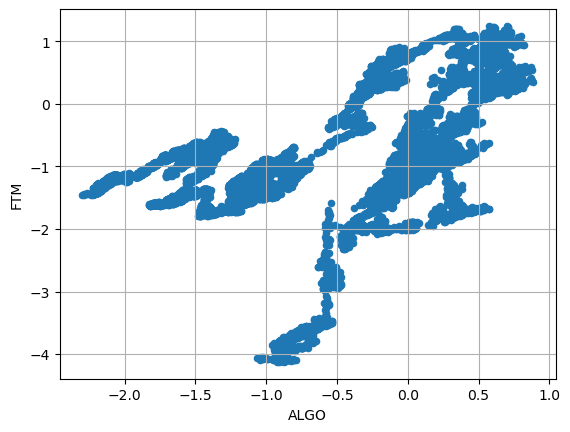

In [8]:
# non-cointegrated pair
# ALGOFTM
log_df_time_series.plot.scatter(x='ALGO', y='FTM', grid =True)

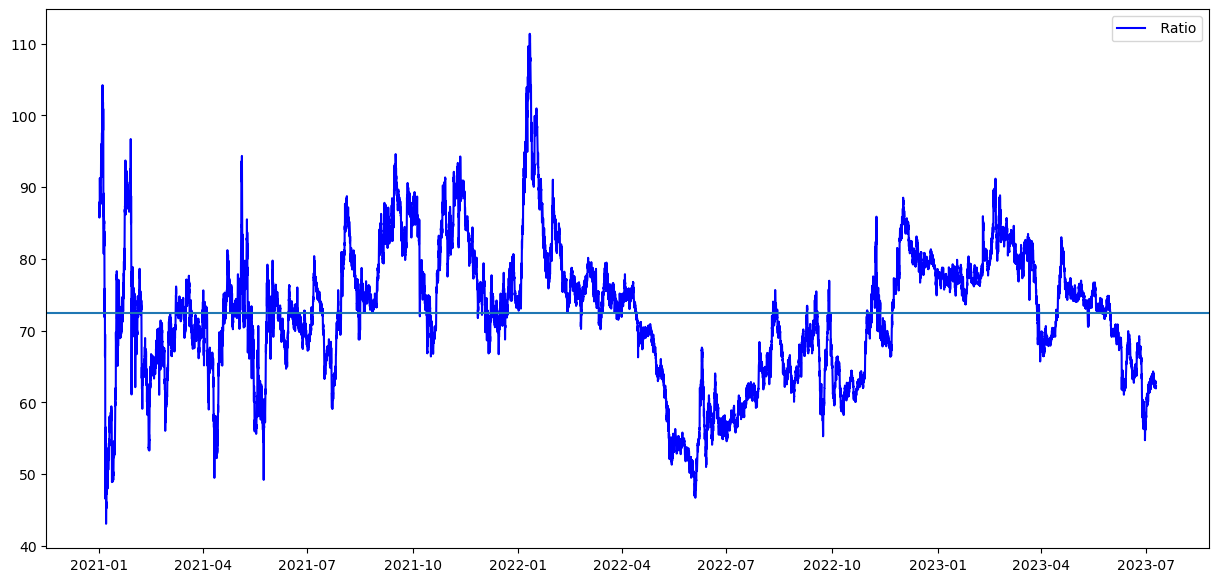

Mean ratio: 72.41


In [18]:
S1 = df_final_time_series[P1]
S2 = df_final_time_series[P2]

merged_P1_P2 = pd.DataFrame({P1: S1, P2: S2})

score, pvalue, _ = coint(S1, S2)
ratios = S1 / S2

plt.figure(figsize=(15,7))

plt.plot(ratios.index, ratios, color='blue')
plt.axhline(ratios.mean())
plt.legend([' Ratio'])
plt.show()

print('Mean ratio: {:.2f}'.format(ratios.mean()))


In [19]:
# expect ratio to move around a stable mean (horizontal blue line)

In [20]:
ratios

timestamp
2021-01-01 00:00:00    87.593757
2021-01-01 01:00:00    86.240980
2021-01-01 02:00:00    87.231013
2021-01-01 03:00:00    87.898196
2021-01-01 04:00:00    85.888306
                         ...    
2023-07-09 21:00:00    61.997982
2023-07-09 22:00:00    62.066532
2023-07-09 23:00:00    62.121212
2023-07-10 00:00:00    61.952965
2023-07-10 01:00:00    62.281603
Length: 22068, dtype: float64

In [21]:
# expect orange line to close-up (mean-revert to the green line in the shortest time possible)

# divergence suggests trading opportunities

# prolonged divergence is not good

# Hurst Exponent

In [53]:
from sklearn.linear_model import LinearRegression

# calculate spread 

def spread(y,x):
    constant = pd.DataFrame(pd.Series([1]*len(df_final_time_series[x]),index = df_final_time_series[x].index),columns=['constant'])
    add_x_constant = pd.concat([df_final_time_series[x],constant], axis = 1)
    reg = LinearRegression().fit(add_x_constant,df_final_time_series[y])
    beta = reg.coef_[0]
    alpha = reg.intercept_
    spread = df_final_time_series[y] - beta*df_final_time_series[x]-alpha
    return spread

In [130]:
def rolling_hurst(df):
    hurst = []
    print(len(df))
    for i in range(10000,len(df)):
        lags= range(2,5)
        tau = [np.sqrt(np.std(np.subtract(df[i-100 :i][lag:],df[i-100 :i][:-lag]))) for lag in lags]
        poly = np.polyfit(np.log(lags),np.log(tau),1)
        hurst.append(poly[0]*2)
    return hurst

In [211]:
def eligible_pair(pair):
    list1 = []
    for i, (x,y) in enumerate(pair['pairs']):
        if np.mean(rolling_hurst(spread(x,y))) > 0.4:
            list1.append(i)
    return pair.drop(pair.index[list1])

eligible_pair = eligible_pair(top_pairs)
eligible_pair

In the context of selecting pairs spread , a low Hurst exponent value, less than 0.5 suggests mean-reverting behavior This means that the spread between the selected pairs tends to revert to its mean value over time, wich aids to identifying pairs with mean-reverting properties.


In [316]:
P1 = "LINK"
P2 = "XLM"
top_pair_spread = spread(P2,P1)
top_pair_spread

timestamp
2021-01-01 00:00:00   -0.028674
2021-01-01 01:00:00   -0.026955
2021-01-01 02:00:00   -0.028640
2021-01-01 03:00:00   -0.029511
2021-01-01 04:00:00   -0.026384
                         ...   
2023-07-09 21:00:00    0.009230
2023-07-09 22:00:00    0.009159
2023-07-09 23:00:00    0.009051
2023-07-10 00:00:00    0.009048
2023-07-10 01:00:00    0.008535
Length: 22068, dtype: float64

In [47]:
def get_hurst_exponent(time_series, max_lag=20):
    """Returns the Hurst Exponent of the time series"""
    
    lags = range(2, max_lag)

    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]

    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)

    return reg[0]

In [58]:
for lag in [20, 100, 300, 500, 1000]:
    hurst_exp = get_hurst_exponent(top_pair_spread.values, lag)
    print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")

Hurst exponent with 20 lags: 0.4913
Hurst exponent with 100 lags: 0.4457
Hurst exponent with 300 lags: 0.4088
Hurst exponent with 500 lags: 0.3652
Hurst exponent with 1000 lags: 0.2465


The Hurst exponent ranges between 0 and 1, with values less than 0.5 indicating a mean-reverting behavior and values closer or above 0.5 indicating a persistent or trending behavior (more likely to continue).

# Kolmogorov Smirnov Test 

Determine the distribution of the ratios

In [22]:
def EPDF(data, num_bins=20):
    """Calculate the empirical probability density function (PDF) of a one-dimensional data set"""
    hist, bins = np.histogram(data, bins=num_bins, density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    return bin_centers, hist

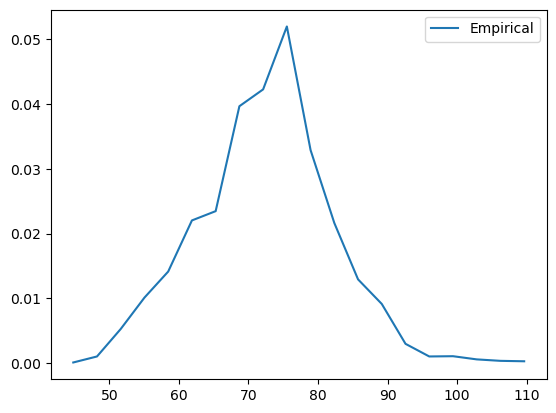

In [23]:
# plot pdf 

pdf_x, pdf_y = EPDF(ratios)

plt.plot(pdf_x, pdf_y, label='Empirical')
plt.legend()
plt.show()

In [24]:
def ECDF(data):
    """Calculate the empirical cumulative distribution function (ECDF) of a one-dimensional data set"""
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

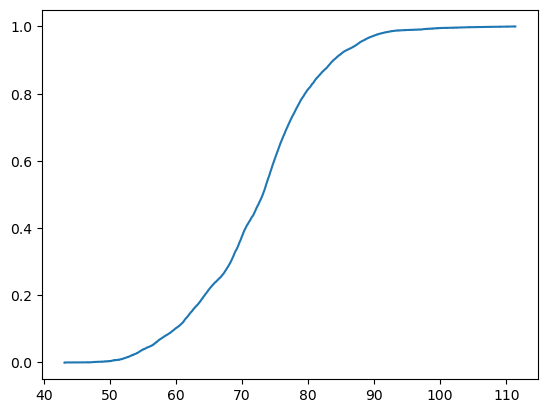

In [25]:
ecdf_x, ecdf_y = ECDF(ratios)
plt.step(ecdf_x, ecdf_y, label='Empirical')

# Function to find ditribution for all top pairs

In [299]:
def fit_dist(P1, P2, df_final_time_series):
    S1 = df_final_time_series[P1]
    S2 = df_final_time_series[P2]
    ratios = S1 / S2
    dist = distfit.distfit(bins=25,alpha=0.02,stats='ks')
    dist.fit_transform(ratios,verbose=1)
    name, params = dist.summary[['name', 'params']].iloc[0]
    return name, params

In [303]:
best_dist = {}

for coin in list(top_pairs['pairs']):
    name, params = fit_dist(coin[0], coin[1], df_final_time_series)
    best_dist[coin] = {'distribution': name, 'params': params}

best_dist

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >DEBUG> (72.40760386238492, 9.333265456001143)
[distfit] >INFO> [norm      ] [0.00 sec] [ks: 1.15279e-07] [loc=72.408 scale=9.333]
[distfit] >DEBUG> (43.087812205616515, 29.319791656768402)
[distfit] >INFO> [expon     ] [0.00 sec] [ks: 1.44841] [loc=43.088 scale=29.320]
[distfit] >DEBUG> (73243483.03040121, -2147483604.9121878, 2147483648.0)
[distfit] >INFO> [pareto    ] [0.03 sec] [ks: 1.44841] [loc=-2147483604.912 scale=2147483648.000]
[distfit] >DEBUG> (1.2173049586284856, 72.21796739613293, 7.77930289067179)
[distfit] >INFO> [dweibull  ] [0.20 sec] [ks: 1.15279e-07] [loc=72.218 scale=7.779]
[distfit] >DEBUG> (20.37255286015057, 72.40674491282617, 8.88750357143159)
[distfit] >INFO> [t         ] [1.34 sec] [ks: 1.15279e-07] [loc=72.407 scale=8.888]
[distfit] >DEBUG> (0.20294204462356988, 68.74286568457572, 9.208494731991674)
[distfit] >INFO> [genextreme] [0.84 sec] [ks: 0.00194497] [loc=68.743 scale=9.208]
[distfit] >DEBUG> (1

[distfit] >DEBUG> (-0.05779589876439303, 1.6495110211371289, 0.328048750945904)
[distfit] >INFO> [genextreme] [0.31 sec] [ks: 0.322892] [loc=1.650 scale=0.328]
[distfit] >DEBUG> (5.892635814925994, 0.7902426272625072, 0.1811979458333339)
[distfit] >INFO> [gamma     ] [0.08 sec] [ks: 0.807543] [loc=0.790 scale=0.181]
[distfit] >DEBUG> (0.3508848540810785, 0.6373994901147954, 1.1433800344296827)
[distfit] >INFO> [lognorm   ] [0.01 sec] [ks: 0.545091] [loc=0.637 scale=1.143]
[distfit] >DEBUG> (5.909023300054994, 41809838728.38728, 0.7896764694430471, 7557797235.737584)
[distfit] >INFO> [beta      ] [0.46 sec] [ks: 0.807543] [loc=0.790 scale=7557797235.738]
[distfit] >DEBUG> (0.8179570355040364, 4.12594024907669)
[distfit] >INFO> [uniform   ] [0.00 sec] [ks: 5.80126] [loc=0.818 scale=4.126]
[distfit] >DEBUG> (1342.001738159901, -132.3667061835514, 18.638614862466184)
[distfit] >INFO> [loggamma  ] [0.17 sec] [ks: 1.10847] [loc=-132.367 scale=18.639]
[distfit] >INFO> Compute confidence inter

{('LINK', 'XLM'): {'distribution': 'norm',
  'params': (72.40760386238492, 9.333265456001143)},
 ('XLM', 'AAVE'): {'distribution': 'genextreme',
  'params': (0.05385391967651392,
   0.0011546620830114739,
   0.00021292276723650853)},
 ('BCH', 'MKR'): {'distribution': 'genextreme',
  'params': (-0.06446616209265797, 0.16696004786984603, 0.03783835684864291)},
 ('HBAR', 'ALGO'): {'distribution': 'norm',
  'params': (0.23220674842871905, 0.06128185503431806)},
 ('BCH', 'AAVE'): {'distribution': 'genextreme',
  'params': (-0.05779589876439303, 1.6495110211371289, 0.328048750945904)}}

# Disfit Library

Fit emperical results into various distributions

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >DEBUG> (72.40760386238492, 9.333265456001143)
[distfit] >INFO> [norm      ] [0.01 sec] [ks: 1.15279e-07] [loc=72.408 scale=9.333]
[distfit] >DEBUG> (43.087812205616515, 29.319791656768402)
[distfit] >INFO> [expon     ] [0.00 sec] [ks: 1.44841] [loc=43.088 scale=29.320]
[distfit] >DEBUG> (73243483.03040121, -2147483604.9121878, 2147483648.0)
[distfit] >INFO> [pareto    ] [0.03 sec] [ks: 1.44841] [loc=-2147483604.912 scale=2147483648.000]
[distfit] >DEBUG> (1.2173049586284856, 72.21796739613293, 7.77930289067179)
[distfit] >INFO> [dweibull  ] [0.25 sec] [ks: 1.15279e-07] [loc=72.218 scale=7.779]
[distfit] >DEBUG> (20.37255286015057, 72.40674491282617, 8.88750357143159)
[distfit] >INFO> [t         ] [1.51 sec] [ks: 1.15279e-07] [loc=72.407 scale=8.888]
[distfit] >DEBUG> (0.20294204462356988, 68.74286568457572, 9.208494731991674)
[distfit] >INFO> [genextreme] [1.15 sec] [ks: 0.00194497] [loc=68.743 scale=9.208]
[distfit] >DEBUG> (1

(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nnorm(loc=72.4076, scale=9.33327)'}, xlabel='Values', ylabel='Frequency'>)

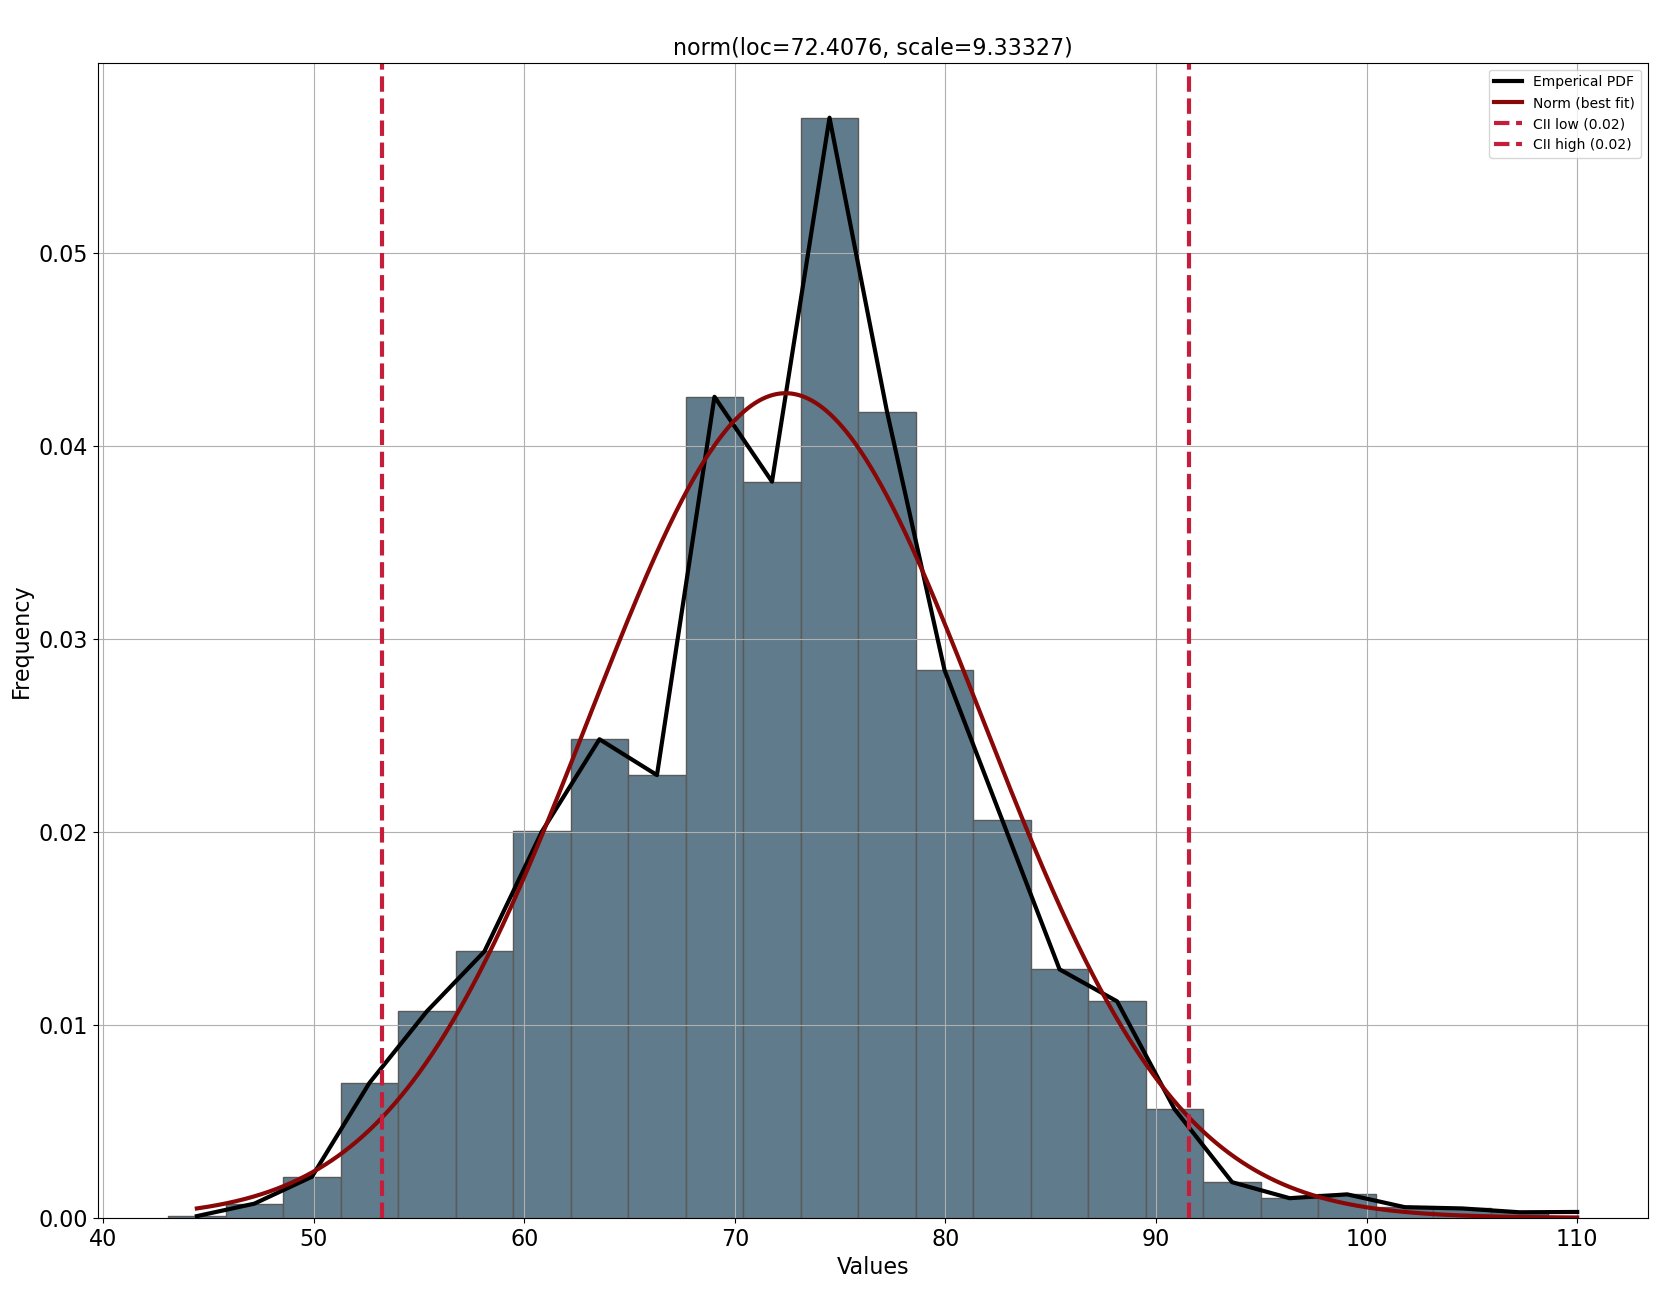

In [26]:
import distfit

# Initialize model
dist1 = distfit.distfit(bins=25,alpha=0.02,stats='ks')

# Fit
dist1.fit_transform(ratios,verbose=1)

dist1.plot(verbose=1)

In [96]:
pd.set_option('display.max_colwidth', None)

dist1.summary

name     score                loc         scale  \
0         norm       0.0          72.407604      9.333265   
1     dweibull       0.0          72.217967      7.779303   
2            t       0.0          72.406745      8.887504   
3        gamma       0.0        -237.833234      0.280745   
4      lognorm       0.0        -423.573054    495.892871   
5   genextreme  0.001945          68.742866      9.208495   
6         beta  0.001945         -53.239318   2443.744428   
7     loggamma  0.001945       -2199.277845    321.265101   
8        expon  1.448411          43.087812     29.319792   
9       pareto  1.448411 -2147483604.912188  2147483648.0   
10     uniform  4.401871          43.087812     68.278572   

                                         arg  \
0                                         ()   
1                      (1.2173049586284856,)   
2                       (20.37255286015057,)   
3                      (1105.0546627895374,)   
4                    (0.018815333389585957,)   
5                     (0.20294204462356988,)   
6   (171.30132290659782, 3159.0614234402947)   
7                      (1177.9070007733162,)   
8                                         ()   
9                       (73243483.03040121,)   
10                                        ()   

                                                                              params  \
0                                             (72.40760386238492, 9.333265456001143)   
1                          (1.2173049586284856, 72.21796739613293, 7.77930289067179)   
2                           (20.37255286015057, 72.40674491282617, 8.88750357143159)   
3                      (1105.0546627895374, -237.83323438531477, 0.2807450157992156)   
4                      (0.018815333389585957, -423.5730541316342, 495.8928714804427)   
5                        (0.20294204462356988, 68.74286568457572, 9.208494731991674)   
6   (171.30132290659782, 3159.0614234402947, -53.23931754665351, 2443.7444284880685)   
7                       (1177.9070007733162, -2199.2778445742606, 321.2651011603316)   
8                                           (43.087812205616515, 29.319791656768402)   
9                             (73243483.03040121, -2147483604.9121878, 2147483648.0)   
10                                            (43.087812205616515, 68.2785723167535)   

                                                                                model  \
0   <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f963d69eda0>   
1   <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f963d6b7850>   
2   <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f963d6b5ab0>   
3   <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f963d6b50f0>   
4   <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f963d6b4a60>   
5   <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f963d6b6830>   
6   <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f963d6b4d30>   
7   <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f963d6b5000>   
8   <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f963d6b76d0>   
9   <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f963d6b5480>   
10  <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f963d6b4f10>   

   bootstrap_score bootstrap_pass    color  
0                0           None  #e41a1c  
1                0           None  #e41a1c  
2                0           None  #377eb8  
3                0           None  #4daf4a  
4                0           None  #984ea3  
5                0           None  #ff7f00  
6                0           None  #ffff33  
7                0           None  #a65628  
8                0           None  #f781bf  
9                0           None  #999999  
10               0           None  #999999

In [297]:
name, params = dist1.summary[['name', 'params']].iloc[0]

params

(72.40760386238492, 9.333265456001143)

# Trading Strategy (dweibull - )

Signal

- Percentile value 

Trigger 

- Buy: When percentile > 95%
- Sell: When percentile < 5%
- Close all: when percentile between 40 to 60%



In [288]:
from scipy.stats import dweibull
# from scipy.stats import weibull_min

# k = 1.2173049586284856
# mu = 72.21796739613293
# lam = 7.77930289067179

# # dist = dweibull(k, mu, lam)
# dist = weibull_min(k, mu, lam)
# plt.plot(x, dist.pdf(x), c='black', label=r'$k=%.1f,\ \lambda=%i$' % (k, lam))

# plt.xlim(40, 1100)
# plt.ylim(0, 10)

# plt.xlabel('$x$')
# plt.ylabel(r'$p(x|k,\lambda)$')
# plt.title('Weibull Distribution')

# plt.legend()
# plt.show()

print(dweibull.fit(ratios))

(1.2173049586284856, 72.21796739613293, 7.77930289067179)


In [205]:
dweibull.ppf(0.95, 1.2173049586284856, loc=72.21796739613293, scale=7.77930289067179)

upper_thresh = dweibull.ppf(upper, 1.2173049586284856, loc=72.21796739613293, scale=7.77930289067179)
    lower_thresh = dweibull.ppf(lower, 1.2173049586284856, loc=72.21796739613293, scale=7.77930289067179)
    close_thresh1 = dweibull.ppf(0.75, 1.2173049586284856, loc=72.21796739613293, scale=7.77930289067179)
    close_thresh2 = dweibull.ppf(0.25, 1.2173049586284856, loc=72.21796739613293, scale=7.77930289067179)

87.65259308331525

In [344]:
# Trade using a simple strategy WITH INVENTORY
def trade(P1, P2, upper, lower):
    
    # Select prices to use: train or test data

#     print('Trade on Training Data')
#     print('\n')
    price1 = df_final_time_series[P1]
    price2 = df_final_time_series[P2]
    
    # Compute rolling mean and rolling standard deviation
    # Trading signals for execution
    ratios = price1/price2
    
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    drawdown = 0
    
    upper_thresh = dweibull.ppf(upper, 1.2173049586284856, loc=72.21796739613293, scale=7.77930289067179)
    lower_thresh = dweibull.ppf(lower, 1.2173049586284856, loc=72.21796739613293, scale=7.77930289067179)
    close_thresh1 = dweibull.ppf(0.75, 1.2173049586284856, loc=72.21796739613293, scale=7.77930289067179)
    close_thresh2 = dweibull.ppf(0.25, 1.2173049586284856, loc=72.21796739613293, scale=7.77930289067179)
    
    # Logging all transactions for validation
    transactions = []
    
    def logTxn(datetime, action1, coin1, price1, qty1,
               action2, coin2, price2, qty2, hedgeratio, pnl, drawdown=0, holdingperiod=timedelta(0)):
        
        txn = {}
        txn['datetime'] = datetime
        txn['action1'] = action1
        txn['coin1'] = coin1
        txn['price1'] = price1
        txn['qty1'] = qty1
        txn['action2'] = action2
        txn['coin2'] = coin2
        txn['price2'] = price2
        txn['qty2'] = qty2
        txn['hedgeratio'] = hedgeratio
        txn['pnl'] = pnl
        txn['drawdown'] = drawdown
        txn['holdingperiod'] = holdingperiod
        
        return txn
    
    # Simulate trading
    # Period by period
    # Trade on trading signals derived based on information only available at the point in time
    
    trades = 0
    
    for i in range(len(ratios)):

        # Sell short if the z-score is > 1
        if ((ratios[i] > upper_thresh) & (countS1 == 0) & (countS2 == 0)):
            money += price1[i] - price2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            
            opendatetime = ratios.index[i]
            
            transactions.append(
                logTxn(opendatetime, 
                       'Sell', P1, price1[i], countS1,
                       'Buy', P2, price2[i], countS2, 
                        ratios[i], money)
            )
                            
        # Buy long if the ratio is above the 95th percentile
        elif ((ratios[i] < lower_thresh) & (countS1 == 0) & (countS2 == 0)):
            money -= price1[i] - price2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]

            opendatetime = ratios.index[i]

            transactions.append(
                logTxn(opendatetime, 
                       'Buy', P1, price1[i], countS1,
                       'Sell', P2, price2[i], countS2, 
                       ratios[i], money)
            )
            
        # Close all positions if the ratio is below 5th percentile
        elif close_thresh2 < ratios[i] < close_thresh1 and ((countS1 != 0) or (countS2 != 0)):
            money += price1[i] * countS1 + price2[i] * countS2

            closedatetime = ratios.index[i]
            holdingperiod = closedatetime - opendatetime

            transactions.append(
                logTxn(closedatetime, 
                       'Close', P1, price1[i], countS1,
                       'Close', P2, price2[i], countS2, 
                       ratios[i], money, min(money, drawdown), holdingperiod)
            )
            
            countS1 = 0
            countS2 = 0
            drawdown = 0
            
        # Keeps track of maximum drawdown when there are existing positions
        else:            
            drawdown = min(price1[i] * countS1 + price2[i] * countS2, drawdown)
            
    if countS1 != 0 or countS2 != 0:
        money = money + price1[-1] * countS1 + price2[-1] * countS2
        transactions.append(
        logTxn(opendatetime, 
                       'End', P1, price1[i], countS1,
                       'End', P2, price2[i], countS2, 
                       ratios[i], money)
        )
    
    return transactions

In [335]:
def showResults(txn):
    
    txn = pd.DataFrame.from_dict(txn)
    txn = txn[['datetime', 'action1', 'coin1', 'price1', 'qty1',
               'action2', 'coin2', 'price2', 'qty2', 
                'hedgeratio', 'pnl', 'drawdown', 'holdingperiod']]
    txn = txn.set_index('datetime')    
    
    plt.figure(figsize=(15,7))
    plt.plot(txn.pnl.index, txn.pnl)    

    ax = plt.gca()
    formatter = DateFormatter("%Y-%m")
    ax.xaxis.set_major_formatter(formatter)
    locator = MonthLocator()
    ax.xaxis.set_major_locator(locator)  
    ax.tick_params(axis='x', rotation=45)
    
    plt.show()

    print('Profit/Loss: {:.2f}'.format(txn.iloc[-1].pnl))
    print('Maximum Drawdown: {:.2f}'.format(min(txn.drawdown)))
    print('Maximum Holding Period: {}'.format(max(txn.holdingperiod)))
    
    return txn

In [347]:
# Trade with t score

upper = np.arange(0.8, 1.0, 0.01)
lower = np.arange(0.05, 0.20, 0.01)

combine = [upper,lower]
params = list(itertools.product(*combine)) 


search_results = []

for param in notebook.tqdm(params):
    result = {}
    txn = trade(P1, P2, param[0], param[1])
    
    txn = pd.DataFrame.from_dict(txn)
    txn = txn[['datetime', 'action1', 'coin1', 'price1', 'qty1',
               'action2', 'coin2', 'price2', 'qty2', 
               'hedgeratio', 'pnl', 'drawdown', 'holdingperiod']]
    txn = txn.set_index('datetime')    

    result['parameter'] = param
    result['PnL'] = txn.iloc[-1].pnl
    result['max_drawdown'] = min(txn.drawdown)
    result['score'] = result['PnL']/abs(result['max_drawdown'])
    
    search_results.append(result)

  0%|          | 0/320 [00:00<?, ?it/s]

Best Parameters: Near: 0.9800000000000002, Far: 0.05


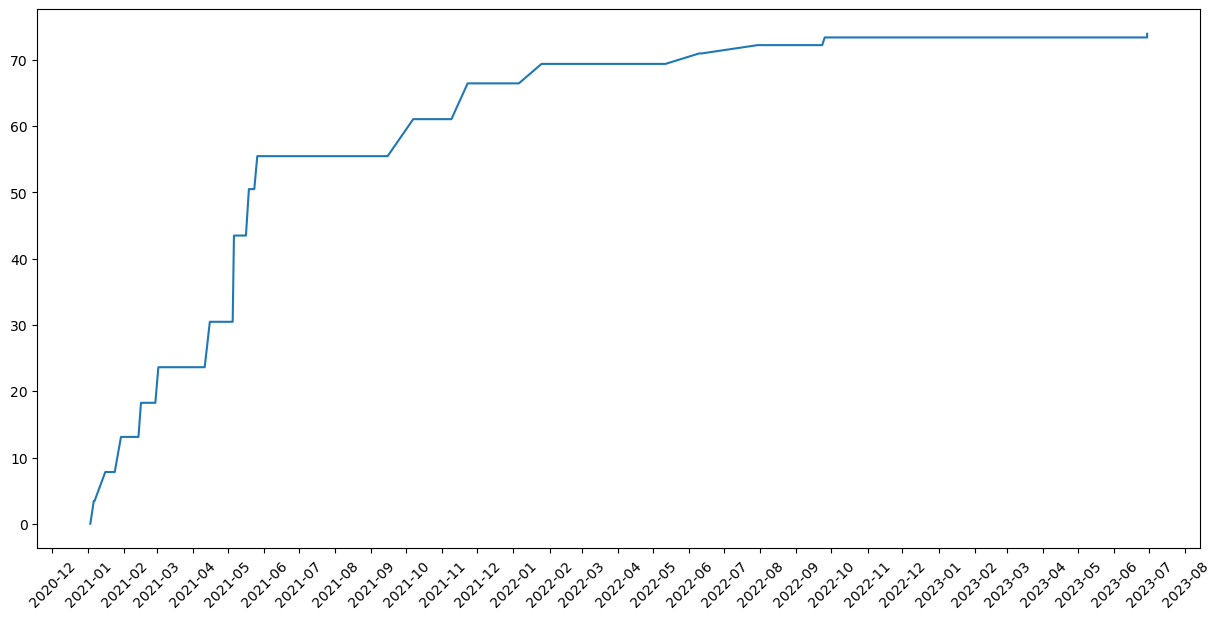

Profit/Loss: 73.95
Maximum Drawdown: -4.73
Maximum Holding Period: 47 days 18:00:00


In [348]:
# best params for near and far MA in calculating thresh holds

best = pd.DataFrame(search_results).sort_values('score', ascending=False).reset_index().parameter[0]
print('Best Parameters: Near: {}, Far: {}'.format(best[0], best[1]))
txn = trade(P1, P2, best[0], best[1])
train_results = showResults(txn)

In [329]:
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

train_results

action1 coin1   price1  qty1 action2 coin2   price2  \
datetime                                                                  
2021-01-01 03:00:00    Sell  LINK  11.5006    -1     Buy   XLM  0.13084   
2021-01-05 15:00:00   Close  LINK  14.5176    -1   Close   XLM  0.18925   
2021-01-06 07:00:00     Buy  LINK  14.3326     1    Sell   XLM  0.26078   
2021-01-15 13:00:00   Close  LINK  20.6228     1   Close   XLM  0.29557   
2021-01-23 12:00:00    Sell  LINK  23.8631    -1     Buy   XLM  0.26603   
2021-01-29 00:00:00   Close  LINK  23.3213    -1   Close   XLM  0.30600   
2021-02-13 00:00:00     Buy  LINK  31.3580     1    Sell   XLM  0.56321   
2021-02-15 04:00:00   Close  LINK  31.0693     1   Close   XLM  0.46556   
2021-02-27 12:00:00     Buy  LINK  25.9729     1    Sell   XLM  0.46346   
2021-03-02 02:00:00   Close  LINK  29.0049     1   Close   XLM  0.42171   
2021-04-10 21:00:00     Buy  LINK  31.4244     1    Sell   XLM  0.55597   
2021-04-15 07:00:00   Close  LINK  42.3825     1   Close   XLM  0.62855   
2021-05-04 17:00:00    Sell  LINK  45.5410    -1     Buy   XLM  0.50846   
2021-05-06 00:00:00   Close  LINK  47.7950    -1   Close   XLM  0.65590   
2021-05-16 07:00:00     Buy  LINK  44.0770     1    Sell   XLM  0.78039   
2021-05-18 20:00:00   Close  LINK  43.6360     1   Close   XLM  0.64850   
2021-05-23 11:00:00     Buy  LINK  19.3130     1    Sell   XLM  0.34110   
2021-05-26 01:00:00   Close  LINK  29.5940     1   Close   XLM  0.43481   
2021-08-03 00:00:00    Sell  LINK  24.1390    -1     Buy   XLM  0.27532   
2021-08-11 03:00:00   Close  LINK  24.9610    -1   Close   XLM  0.32203   
2021-09-06 08:00:00    Sell  LINK  34.5700    -1     Buy   XLM  0.39370   
2021-10-06 22:00:00   Close  LINK  26.8900    -1   Close   XLM  0.34930   
2021-10-26 19:00:00    Sell  LINK  33.4300    -1     Buy   XLM  0.38040   
2021-10-31 06:00:00   Close  LINK  29.8200    -1   Close   XLM  0.38460   
2021-11-05 12:00:00    Sell  LINK  33.0200    -1     Buy   XLM  0.36550   
2021-11-22 16:00:00   Close  LINK  27.4000    -1   Close   XLM  0.35400   
2022-01-05 01:00:00    Sell  LINK  25.1200    -1     Buy   XLM  0.28000   
2022-01-25 02:00:00   Close  LINK  15.3900    -1   Close   XLM  0.19790   
2022-01-30 20:00:00    Sell  LINK  17.3600    -1     Buy   XLM  0.19500   
2022-02-08 00:00:00   Close  LINK  18.7800    -1   Close   XLM  0.24260   
2022-05-11 12:00:00     Buy  LINK   7.1500     1    Sell   XLM  0.12760   
2022-06-09 13:00:00   Close  LINK   9.4400     1   Close   XLM  0.14020   
2022-06-11 20:00:00     Buy  LINK   7.0800     1    Sell   XLM  0.12500   
2022-07-29 14:00:00   Close  LINK   7.8970     1   Close   XLM  0.11740   
2022-09-23 02:00:00     Buy  LINK   7.0890     1    Sell   XLM  0.12490   
2022-09-25 06:00:00   Close  LINK   7.9080     1   Close   XLM  0.11890   
2022-12-01 21:00:00    Sell  LINK   7.6990    -1     Buy   XLM  0.08750   
2022-12-16 15:00:00   Close  LINK   6.1600    -1   Close   XLM  0.07980   
2023-02-18 12:00:00    Sell  LINK   8.1260    -1     Buy   XLM  0.09070   
2023-03-11 19:00:00   Close  LINK   6.0920    -1   Close   XLM  0.07830   
2023-06-29 02:00:00     Buy  LINK   5.8060     1    Sell   XLM  0.10260   
2023-06-29 02:00:00     End  LINK   6.0600     1     End   XLM  0.09730   

                          qty2  hedgeratio        pnl  drawdown  \
datetime                                                          
2021-01-01 03:00:00  87.898196   87.898196   0.000000  0.000000   
2021-01-05 15:00:00  87.898196   76.711229   2.117134 -2.183068   
2021-01-06 07:00:00 -54.960503   54.960503   2.117134  0.000000   
2021-01-15 13:00:00 -54.960503   69.772981   6.495258 -4.663237   
2021-01-23 12:00:00  89.700786   89.700786   6.495258  0.000000   
2021-01-29 00:00:00  89.700786   76.213399  10.622398 -1.761121   
2021-02-13 00:00:00 -55.677278   55.677278  10.622398  0.000000   
2021-02-15 04:00:00 -55.677278   66.735329  15.770584 -1.363690   
2021-02-27 12:00:00 -56.041298   56.041298  15.77

In [270]:
train_results[train_results['action1'] == "Close"]

action1 coin1   price1  qty1 action2 coin2   price2  \
datetime                                                                  
2021-01-05 15:00:00   Close  LINK  14.5176    -1   Close   XLM  0.18925   
2021-01-06 08:00:00   Close  LINK  14.5588     1   Close   XLM  0.25676   
2021-01-06 10:00:00   Close  LINK  15.2445     1   Close   XLM  0.29274   
2021-01-06 12:00:00   Close  LINK  15.6403     1   Close   XLM  0.33606   
2021-01-06 14:00:00   Close  LINK  15.9716     1   Close   XLM  0.29862   
...                     ...   ...      ...   ...     ...   ...      ...   
2023-06-30 13:00:00   Close  LINK   5.9620     1   Close   XLM  0.10740   
2023-06-30 15:00:00   Close  LINK   6.0810     1   Close   XLM  0.10740   
2023-06-30 19:00:00   Close  LINK   6.3110     1   Close   XLM  0.11240   
2023-06-30 21:00:00   Close  LINK   6.3000     1   Close   XLM  0.11130   
2023-07-01 03:00:00   Close  LINK   6.2150     1   Close   XLM  0.10790   

                          qty2  hedgeratio        pnl  drawdown  \
datetime                                                          
2021-01-05 15:00:00  87.898196   76.711229   2.117134 -2.183068   
2021-01-06 08:00:00 -54.960503   56.701979   2.564275  0.000000   
2021-01-06 10:00:00 -56.378362   52.075220   1.304573  0.000000   
2021-01-06 12:00:00 -48.845237   46.540201   0.529943  0.000000   
2021-01-06 14:00:00 -47.622576   53.484696   2.280489  0.000000   
...                        ...         ...        ...       ...   
2023-06-30 13:00:00 -56.058981   55.512104  56.167910  0.000000   
2023-06-30 15:00:00 -56.120930   56.620112  56.221522  0.000000   
2023-06-30 19:00:00 -56.388889   56.147687  56.194411  0.000000   
2023-06-30 21:00:00 -56.594595   56.603774  56.195432  0.000000   
2023-07-01 03:00:00 -56.645397   57.599629  56.298394  0.000000   

                      holdingperiod  
datetime                             
2021-01-05 15:00:00 4 days 12:00:00  
2021-01-06 08:00:00 0 days 01:00:00  
2021-01-06 10:00:00 0 days 01:00:00  
2021-01-06 12:00:00 0 days 01:00:00  
2021-01-06 14:00:00 0 days 01:00:00  
...                             ...  
2023-06-30 13:00:00 0 days 01:00:00  
2023-06-30 15:00:00 0 days 01:00:00  
2023-06-30 19:00:00 0 days 01:00:00  
2023-06-30 21:00:00 0 days 01:00:00  
2023-07-01 03:00:00 0 days 01:00:00  

[663 rows x 12 columns]

In [275]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

# Create subplots
fig = make_subplots(rows=1, cols=1)

# Plot the ratios and buy and sell signals from z score
fig.add_trace(go.Scatter(x=ratios.index, y=ratios, name='Ratio'))

buy = ratios.copy()
sell = ratios.copy()

# merged_df = buy.to_frame().merge(train_results[train_results['action1'] != 'Buy'], left_index=True, right_index=True, how='inner')
# buy.loc[merged_df.index] = 0
# merged_df = buy.to_frame().merge(train_results[train_results['action1'] != 'Sell'], left_index=True, right_index=True, how='inner')
# sell.loc[merged_df.index] = 0

# sell

buy = train_results[train_results['action1'] == "Buy"]
sell = train_results[train_results['action1'] == "Sell"]
close = train_results[train_results['action1'] == "Close"]


fig.add_trace(go.Scatter(x=buy.index, y=buy['hedgeratio'], mode='markers', name='Buy Signal', marker=dict(color='green', symbol='triangle-up', size=6)))
fig.add_trace(go.Scatter(x=sell.index, y=sell['hedgeratio'], mode='markers', name='Sell Signal', marker=dict(color='red', symbol='triangle-down', size=6)))
fig.add_trace(go.Scatter(x=close.index, y=close['hedgeratio'], mode='markers', name='Close', marker=dict(color='orange', symbol='diamond', size=6)))


fig.update_layout(
    title='Plot Title',
    xaxis_title='Date Time',
    yaxis_title='Ratio',
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)

fig.show()


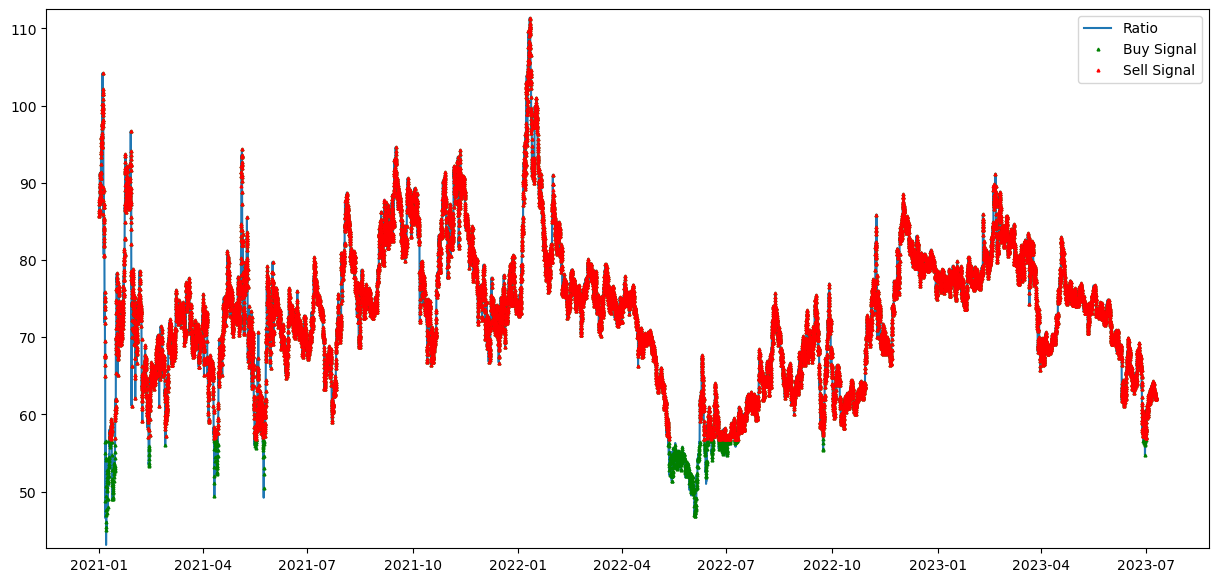

In [240]:
# Plot the ratios and buy and sell signals from z score
plt.figure(figsize=(15,7))

plt.plot(ratios.index, ratios)

buy = ratios.copy()
sell = ratios.copy()


merged_df = buy.to_frame().merge(train_results[train_results['action1'] != 'Buy'], left_index=True, right_index=True, how='inner')
buy.loc[merged_df.index] = 0
merged_df = buy.to_frame().merge(train_results[train_results['action1'] != 'Sell'], left_index=True, right_index=True, how='inner')
sell.loc[merged_df.index] = 0


plt.plot(buy.index, buy, color='g', linestyle='None', marker='^', markersize = 2)
plt.plot(sell.index, sell, color='r', linestyle='None', marker='^', markersize = 2)

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min()*0.99,ratios.max()*1.01))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

# Trading Strategy (genextreme)

Signal

 - Percentile value
 
Trigger

- Buy: When percentile > 95%
- Sell: When percentile < 5%
- Close all: when percentile between 40 to 60%

In [310]:
from scipy.stats import genextreme

print(genextreme.fit(ratios))

(0.20294204462356988, 68.74286568457572, 9.208494731991674)


In [311]:
genextreme.ppf(0.95, 0.20294204462356988, loc=68.74286568457572, scale=9.208494731991674)

89.28460665606471

In [360]:
# Trade using a simple strategy WITH INVENTORY
def trade(P1, P2, upper, lower):
    
    # Select prices to use: train or test data

#     print('Trade on Training Data')
#     print('\n')
    price1 = df_final_time_series[P1]
    price2 = df_final_time_series[P2]
    
    # Compute rolling mean and rolling standard deviation
    # Trading signals for execution
    ratios = price1/price2
    
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    drawdown = 0
    
    upper_thresh = genextreme.ppf(0.95, 0.20294204462356988, loc=68.74286568457572, scale=9.208494731991674)
    lower_thresh = genextreme.ppf(0.05, 0.20294204462356988, loc=68.74286568457572, scale=9.208494731991674)
    close_thresh1 = genextreme.ppf(0.9, 0.20294204462356988, loc=68.74286568457572, scale=9.208494731991674)
    close_thresh2 = genextreme.ppf(0.1, 0.20294204462356988, loc=68.74286568457572, scale=9.208494731991674)
    
    # Logging all transactions for validation
    transactions = []
    
    def logTxn(datetime, action1, coin1, price1, qty1,
               action2, coin2, price2, qty2, hedgeratio, pnl, drawdown=0, holdingperiod=timedelta(0)):
        
        txn = {}
        txn['datetime'] = datetime
        txn['action1'] = action1
        txn['coin1'] = coin1
        txn['price1'] = price1
        txn['qty1'] = qty1
        txn['action2'] = action2
        txn['coin2'] = coin2
        txn['price2'] = price2
        txn['qty2'] = qty2
        txn['hedgeratio'] = hedgeratio
        txn['pnl'] = pnl
        txn['drawdown'] = drawdown
        txn['holdingperiod'] = holdingperiod
        
        return txn
    
    # Simulate trading
    # Period by period
    # Trade on trading signals derived based on information only available at the point in time
    
    trades = 0
    
    for i in range(len(ratios)):

        # Sell short if the z-score is > 1
        if ((ratios[i] > upper_thresh) & (countS1 == 0) & (countS2 == 0)):
            money += price1[i] - price2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            
            opendatetime = ratios.index[i]
            
            transactions.append(
                logTxn(opendatetime, 
                       'Sell', P1, price1[i], countS1,
                       'Buy', P2, price2[i], countS2, 
                        ratios[i], money)
            )
                            
        # Buy long if the ratio is above the 95th percentile
        elif ((ratios[i] < lower_thresh) & (countS1 == 0) & (countS2 == 0)):
            money -= price1[i] - price2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]

            opendatetime = ratios.index[i]

            transactions.append(
                logTxn(opendatetime, 
                       'Buy', P1, price1[i], countS1,
                       'Sell', P2, price2[i], countS2, 
                       ratios[i], money)
            )
            
        # Close all positions if the ratio is below 5th percentile
        elif close_thresh2 < ratios[i] < close_thresh1 and ((countS1 != 0) or (countS2 != 0)):
            money += price1[i] * countS1 + price2[i] * countS2

            closedatetime = ratios.index[i]
            holdingperiod = closedatetime - opendatetime

            transactions.append(
                logTxn(closedatetime, 
                       'Close', P1, price1[i], countS1,
                       'Close', P2, price2[i], countS2, 
                       ratios[i], money, min(money, drawdown), holdingperiod)
            )
            
            countS1 = 0
            countS2 = 0
            drawdown = 0
            
        # Keeps track of maximum drawdown when there are existing positions
        else:            
            drawdown = min(price1[i] * countS1 + price2[i] * countS2, drawdown)
            
    if countS1 != 0 or countS2 != 0:
        money = money + price1[-1] * countS1 + price2[-1] * countS2
        transactions.append(
        logTxn(opendatetime, 
                       'End', P1, price1[i], countS1,
                       'End', P2, price2[i], countS2, 
                       ratios[i], money)
        )
    
    return transactions

In [361]:
def showResults(txn):
    
    txn = pd.DataFrame.from_dict(txn)
    txn = txn[['datetime', 'action1', 'coin1', 'price1', 'qty1',
               'action2', 'coin2', 'price2', 'qty2', 
                'hedgeratio', 'pnl', 'drawdown', 'holdingperiod']]
    txn = txn.set_index('datetime')    
    
    plt.figure(figsize=(15,7))
    plt.plot(txn.pnl.index, txn.pnl)    

    ax = plt.gca()
    formatter = DateFormatter("%Y-%m")
    ax.xaxis.set_major_formatter(formatter)
    locator = MonthLocator()
    ax.xaxis.set_major_locator(locator)  
    ax.tick_params(axis='x', rotation=45)
    
    plt.show()

    print('Profit/Loss: {:.2f}'.format(txn.iloc[-1].pnl))
    print('Maximum Drawdown: {:.2f}'.format(min(txn.drawdown)))
    print('Maximum Holding Period: {}'.format(max(txn.holdingperiod)))
    
    return txn

In [362]:
# Trade with t score

upper = np.arange(0.8, 1.0, 0.01)
lower = np.arange(0.05, 0.20, 0.01)

combine = [upper,lower]
params = list(itertools.product(*combine)) 


search_results = []

for param in notebook.tqdm(params):
    result = {}
    txn = trade(P1, P2, param[0], param[1])
    
    txn = pd.DataFrame.from_dict(txn)
    txn = txn[['datetime', 'action1', 'coin1', 'price1', 'qty1',
               'action2', 'coin2', 'price2', 'qty2', 
               'hedgeratio', 'pnl', 'drawdown', 'holdingperiod']]
    txn = txn.set_index('datetime')    

    result['parameter'] = param
    result['PnL'] = txn.iloc[-1].pnl
    result['max_drawdown'] = min(txn.drawdown)
    result['score'] = result['PnL']/abs(result['max_drawdown'])
    
    search_results.append(result)

  0%|          | 0/320 [00:00<?, ?it/s]

Best Parameters: Near: 0.8, Far: 0.05


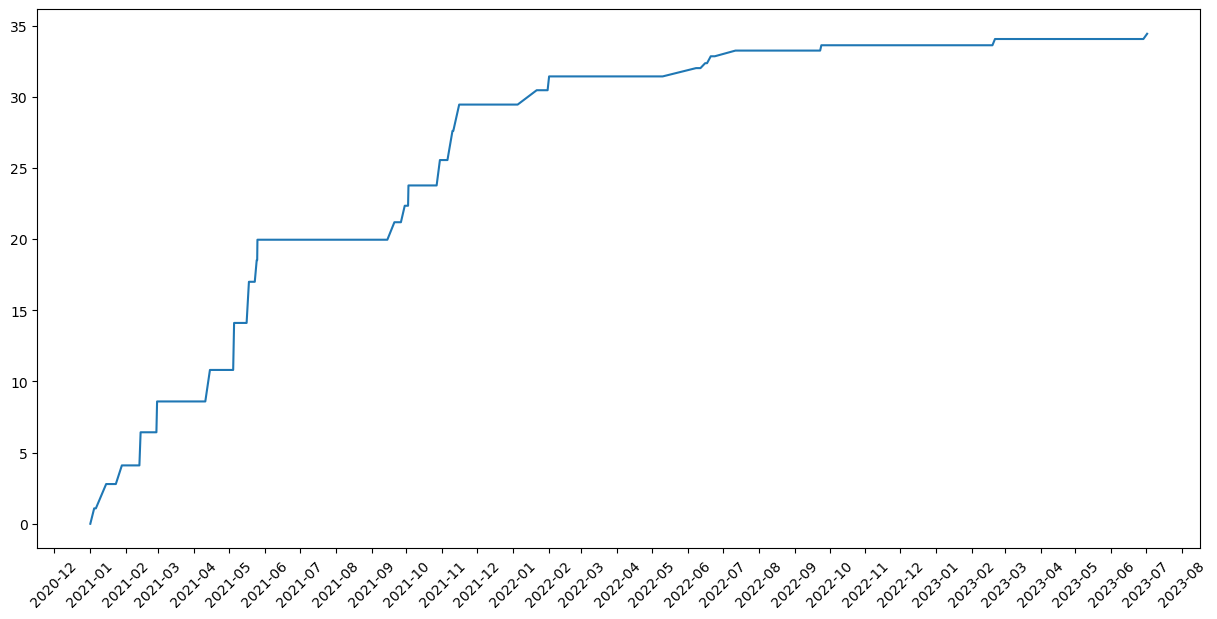

Profit/Loss: 34.44
Maximum Drawdown: -5.47
Maximum Holding Period: 28 days 18:00:00


In [363]:
# best params for near and far MA in calculating thresh holds

best = pd.DataFrame(search_results).sort_values('score', ascending=False).reset_index().parameter[0]
print('Best Parameters: Near: {}, Far: {}'.format(best[0], best[1]))
txn = trade(P1, P2, best[0], best[1])
train_results = showResults(txn)

In [364]:
train_results

action1 coin1   price1  qty1 action2 coin2   price2  \
datetime                                                                  
2021-01-01 12:00:00    Sell  LINK  12.0666    -1     Buy   XLM  0.13254   
2021-01-04 20:00:00   Close  LINK  13.4413    -1   Close   XLM  0.15954   
2021-01-06 07:00:00     Buy  LINK  14.3326     1    Sell   XLM  0.26078   
2021-01-15 04:00:00   Close  LINK  17.9644     1   Close   XLM  0.29576   
2021-01-23 12:00:00    Sell  LINK  23.8631    -1     Buy   XLM  0.26603   
2021-01-28 17:00:00   Close  LINK  23.4717    -1   Close   XLM  0.27627   
2021-02-12 20:00:00     Buy  LINK  30.2750     1    Sell   XLM  0.52999   
2021-02-13 21:00:00   Close  LINK  33.7007     1   Close   XLM  0.54921   
2021-02-27 12:00:00     Buy  LINK  25.9729     1    Sell   XLM  0.46346   
2021-02-28 02:00:00   Close  LINK  25.8385     1   Close   XLM  0.42240   
2021-04-10 16:00:00     Buy  LINK  32.1667     1    Sell   XLM  0.56106   
2021-04-14 16:00:00   Close  LINK  38.2503     1   Close   XLM  0.62855   
2021-05-04 17:00:00    Sell  LINK  45.5410    -1     Buy   XLM  0.50846   
2021-05-05 12:00:00   Close  LINK  48.7990    -1   Close   XLM  0.58172   
2021-05-16 07:00:00     Buy  LINK  44.0770     1    Sell   XLM  0.78039   
2021-05-18 07:00:00   Close  LINK  40.1370     1   Close   XLM  0.65943   
2021-05-23 08:00:00     Buy  LINK  19.4080     1    Sell   XLM  0.34008   
2021-05-25 00:00:00   Close  LINK  26.8950     1   Close   XLM  0.44463   
2021-05-25 10:00:00     Buy  LINK  24.3410     1    Sell   XLM  0.42545   
2021-05-25 15:00:00   Close  LINK  26.1320     1   Close   XLM  0.43166   
2021-09-14 16:00:00    Sell  LINK  29.3600    -1     Buy   XLM  0.32720   
2021-09-20 18:00:00   Close  LINK  23.9400    -1   Close   XLM  0.28050   
2021-09-26 09:00:00    Sell  LINK  24.4500    -1     Buy   XLM  0.27360   
2021-09-29 16:00:00   Close  LINK  22.9700    -1   Close   XLM  0.27000   
2021-10-02 13:00:00    Sell  LINK  26.6600    -1     Buy   XLM  0.29850   
2021-10-02 21:00:00   Close  LINK  27.6000    -1   Close   XLM  0.32500   
2021-10-27 04:00:00    Sell  LINK  33.7300    -1     Buy   XLM  0.37380   
2021-10-30 00:00:00   Close  LINK  30.7900    -1   Close   XLM  0.36100   
2021-11-05 12:00:00    Sell  LINK  33.0200    -1     Buy   XLM  0.36550   
2021-11-09 20:00:00   Close  LINK  34.0800    -1   Close   XLM  0.39990   
2021-11-10 13:00:00    Sell  LINK  36.6000    -1     Buy   XLM  0.40940   
2021-11-15 15:00:00   Close  LINK  33.1400    -1   Close   XLM  0.39140   
2022-01-05 01:00:00    Sell  LINK  25.1200    -1     Buy   XLM  0.28000   
2022-01-21 11:00:00   Close  LINK  19.4100    -1   Close   XLM  0.22760   
2022-01-30 21:00:00    Sell  LINK  17.4100    -1     Buy   XLM  0.19370   
2022-02-01 04:00:00   Close  LINK  17.4100    -1   Close   XLM  0.20450   
2022-05-10 03:00:00     Buy  LINK   8.3100     1    Sell   XLM  0.14490   
2022-06-07 21:00:00   Close  LINK   8.7900     1   Close   XLM  0.14310   
2022-06-11 17:00:00     Buy  LINK   7.1600     1    Sell   XLM  0.12470   
2022-06-15 18:00:00   Close  LINK   6.8400     1   Close   XLM  0.11310   
2022-06-17 09:00:00     Buy  LINK   6.4500     1    Sell   XLM  0.11280   
2022-06-20 14:00:00   Close  LINK   7.1700     1   Close   XLM  0.11690   
2022-06-24 01:00:00     Buy  LINK   7.1000     1    Sell   XLM  0.12440   
2022-07-11 21:00:00   Close  LINK   6.2500     1   Close   XLM  0.10250   
2022-09-22 22:00:00     Buy  LINK   7.1030     1    Sell   XLM  0.12370   
2022-09-23 23:00:00   Close  LINK   7.4490     1   Close   XLM  0.12320   
2023-02-18 12:00:00    Sell  LINK   8.1260    -1     Buy   XLM  0.09070   
2023-02-20 17:00:00   Close  LINK   8.0190    -1   Close   XLM  0.09440   
2023-06-28 16:00:00     Buy  LINK   5.9690     1    Sell   XLM  0.10420   
2023-07-01 22:00:00   Close  LINK   6.4860     1   Close   XLM  0.10680   

                          qty2  hedgeratio        pnl  drawdown  \
datetime                                            

In [324]:
# Create subplots
fig = make_subplots(rows=1, cols=1)

# Plot the ratios and buy and sell signals from z score
fig.add_trace(go.Scatter(x=ratios.index, y=ratios, name='Ratio'))

buy = ratios.copy()
sell = ratios.copy()

# merged_df = buy.to_frame().merge(train_results[train_results['action1'] != 'Buy'], left_index=True, right_index=True, how='inner')
# buy.loc[merged_df.index] = 0
# merged_df = buy.to_frame().merge(train_results[train_results['action1'] != 'Sell'], left_index=True, right_index=True, how='inner')
# sell.loc[merged_df.index] = 0

# sell

buy = train_results[train_results['action1'] == "Buy"]
sell = train_results[train_results['action1'] == "Sell"]
close = train_results[train_results['action1'] == "Close"]


fig.add_trace(go.Scatter(x=buy.index, y=buy['hedgeratio'], mode='markers', name='Buy Signal', marker=dict(color='green', symbol='triangle-up', size=6)))
fig.add_trace(go.Scatter(x=sell.index, y=sell['hedgeratio'], mode='markers', name='Sell Signal', marker=dict(color='red', symbol='triangle-down', size=6)))
fig.add_trace(go.Scatter(x=close.index, y=close['hedgeratio'], mode='markers', name='Close', marker=dict(color='orange', symbol='diamond', size=6)))


fig.update_layout(
    title='Plot Title',
    xaxis_title='Date Time',
    yaxis_title='Ratio',
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)

fig.show()

# Trading Strategy (Gamma distribution - t score)

Signal
- T Score: (Near_MA - Far_MA) / (Std(Far_MA)/sqrt(n))

Trigger (backtest on optimal z score)
- Buy: When there is no existing position and T Score < -200
- Sell: When there is no existing position and T Score > 200
- Close all: When there is existing position and Z Score is between -1 and 1 inclusive

Trade
Where n = Price of Coin 1 / Price of Coin 2

- Buy Signal: Buy 1 x Coin 1 and Sell n x Coin 2
- Sell Signal: Sell 1 x Coin 1 and Buy n x Coin 2

The trade function executes the strategy by taking in the following parameters:

P1 - Coin 1 symbol
P2 - Coin 2 symbol
near - short term moving average period (used as an estimate of current price)
far - long term moving average period (used as an estimate of mean price in which current price will revert to)


In [28]:
def tscore(series):
    return (series - series.mean()) / (np.std(series)/np.sqrt(len(series)))

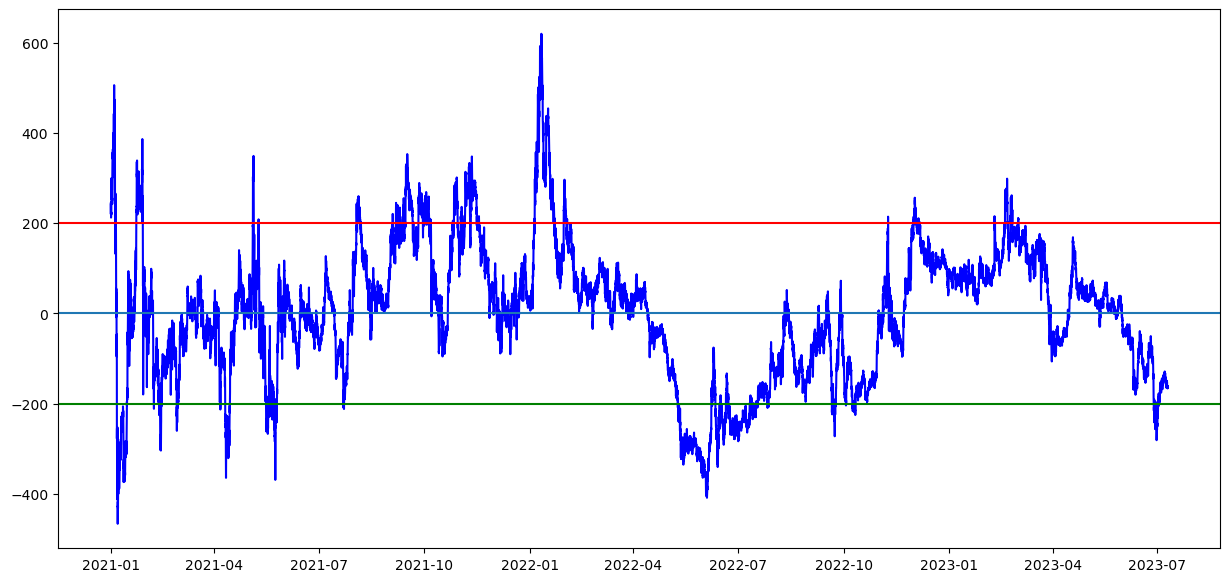

In [29]:
plt.figure(figsize=(15,7))

plt.plot(tscore(ratios).index, tscore(ratios), color='blue')
plt.axhline(tscore(ratios).mean())
plt.axhline(200.0, color='red')
plt.axhline(-200.0, color='green')
plt.show()

In [158]:
# Trade using a simple strategy

from matplotlib.dates import DateFormatter
from matplotlib.dates import MonthLocator

def trade(P1, P2, near, far):

    # If window length is 0, algorithm doesn't make sense, so exit
    if (near == 0) or (far == 0) or (near >= far):
        return 0
    
    # Select prices to use: train or test data

#     print('Trade on Training Data')
#     print('\n')
    price1 = df_final_time_series[P1]
    price2 = df_final_time_series[P2]
    
    # Compute rolling mean and rolling standard deviation
    # Trading signals for execution
    ratios = price1/price2
    ma1 = ratios.rolling(window=near, center=False).mean()
    ma2 = ratios.rolling(window=far, center=False).mean()
    std = ratios.rolling(window=far, center=False).std()
    tscore = (ma1 - ma2)/(std/np.sqrt(len(std)))
    
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    drawdown = 0
    
    # Logging all transactions for validation
    transactions = []
    
    def logTxn(datetime, action1, coin1, price1, qty1,
               action2, coin2, price2, qty2, tscore, hedgeratio, pnl, drawdown=0, holdingperiod=timedelta(0)):
        
        txn = {}
        txn['datetime'] = datetime
        txn['action1'] = action1
        txn['coin1'] = coin1
        txn['price1'] = price1
        txn['qty1'] = qty1
        txn['action2'] = action2
        txn['coin2'] = coin2
        txn['price2'] = price2
        txn['qty2'] = qty2
        txn['tscore'] = tscore
        txn['hedgeratio'] = hedgeratio
        txn['pnl'] = pnl
        txn['drawdown'] = drawdown
        txn['holdingperiod'] = holdingperiod
        
        return txn
    
    # Simulate trading
    # Period by period
    # Trade on trading signals derived based on information only available at the point in time
    
    trades = 0
    
    for i in range(len(ratios)):

        # Sell short if the z-score is > 1 and when there is no existing position
        if (tscore[i] > 200) & (countS1 == 0) & (countS2 == 0):
            trades += 1
            money += price1[i] - price2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            
            opendatetime = ratios.index[i]
            
            transactions.append(
                logTxn(opendatetime, 
                       'Sell', P1, price1[i], countS1,
                       'Buy', P2, price2[i], countS2, 
                       tscore[i], ratios[i], money)
            )
                            
        # Buy long if the z-score is < 1 and when there is no existing position
        elif (tscore[i] < -200) & (countS1 == 0) & (countS2 == 0):
            trades += 1
            money -= price1[i] - price2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]

            opendatetime = ratios.index[i]

            transactions.append(
                logTxn(opendatetime, 
                       'Buy', P1, price1[i], countS1,
                       'Sell', P2, price2[i], countS2, 
                       tscore[i], ratios[i], money)
            )
            
        # Close all positions if the z-score between -.5 and .5
        elif abs(tscore[i]) < 100 and ((countS1 != 0) or (countS2 != 0)):
            trades += 1
            money += price1[i] * countS1 + price2[i] * countS2

            closedatetime = ratios.index[i]
            holdingperiod = closedatetime - opendatetime

            transactions.append(
                logTxn(closedatetime, 
                       'Close', P1, price1[i], countS1,
                       'Close', P2, price2[i], countS2, 
                       tscore[i], ratios[i], money, min(money, drawdown), holdingperiod)
            )
            
            countS1 = 0
            countS2 = 0
            drawdown = 0
            
        # Keeps track of maximum drawdown when there are existing positions
        else:            
            drawdown = min(price1[i] * countS1 + price2[i] * countS2, drawdown)
            
#         print(trades)
            
    return transactions

def showResults(txn):
    
    txn = pd.DataFrame.from_dict(txn)
    txn = txn[['datetime', 'action1', 'coin1', 'price1', 'qty1',
               'action2', 'coin2', 'price2', 'qty2', 
               'tscore', 'hedgeratio', 'pnl', 'drawdown', 'holdingperiod']]
    txn = txn.set_index('datetime')    
    
    plt.figure(figsize=(15,7))
    plt.plot(txn.pnl.index, txn.pnl)    

    ax = plt.gca()
    formatter = DateFormatter("%Y-%m")
    ax.xaxis.set_major_formatter(formatter)
    locator = MonthLocator()
    ax.xaxis.set_major_locator(locator)  
    ax.tick_params(axis='x', rotation=45)
    
    plt.show()

    print('Profit/Loss: {:.2f}'.format(txn.iloc[-1].pnl))
    print('Maximum Drawdown: {:.2f}'.format(min(txn.drawdown)))
    print('Maximum Holding Period: {}'.format(max(txn.holdingperiod)))
    
    return txn

In [159]:
# Trade with t score

near = list(range(5,15,1))
far = list(range(50,90,1))

combine = [near,far]
params = list(itertools.product(*combine)) 

search_results = []

for param in notebook.tqdm(params):
    result = {}
    txn = trade(P1, P2, param[0], param[1])
    
    txn = pd.DataFrame.from_dict(txn)
    txn = txn[['datetime', 'action1', 'coin1', 'price1', 'qty1',
               'action2', 'coin2', 'price2', 'qty2', 
               'tscore', 'hedgeratio', 'pnl', 'drawdown', 'holdingperiod']]
    txn = txn.set_index('datetime')    

    result['parameter'] = param
    result['PnL'] = txn.iloc[-1].pnl
    result['max_drawdown'] = min(txn.drawdown)
    result['score'] = result['PnL']/abs(result['max_drawdown'])
    
    search_results.append(result)

  0%|          | 0/400 [00:00<?, ?it/s]

Best Parameters: Near: 12, Far: 50


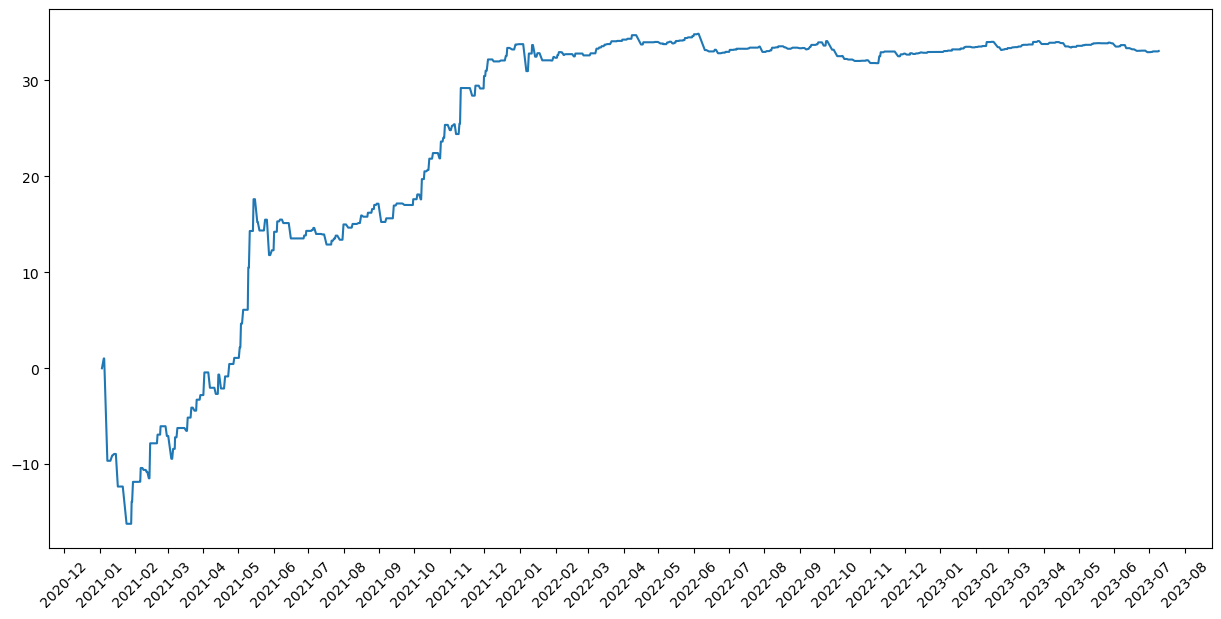

Profit/Loss: 33.06
Maximum Drawdown: -17.36
Maximum Holding Period: 5 days 10:00:00


In [160]:
# best params for near and far MA in calculating thresh holds

best = pd.DataFrame(search_results).sort_values('score', ascending=False).reset_index().parameter[0]
print('Best Parameters: Near: {}, Far: {}'.format(best[0], best[1]))
txn = trade(P1, P2, best[0], best[1])
train_results = showResults(txn)

# Trading Strategy (normal distribution - z score) 

Signal
- Z Score: (Near_MA - Far_MA) / Std(Far_MA)

Trigger (backtest on optimal z score)
- Buy: When there is no existing position and Z Score < -1
- Sell: When there is no existing position and Z Score > 1
- Close all: When there is existing position and Z Score is between -1 and 1 inclusive

Trade
Where n = Price of Coin 1 / Price of Coin 2

- Buy Signal: Buy 1 x Coin 1 and Sell n x Coin 2
- Sell Signal: Sell 1 x Coin 1 and Buy n x Coin 2

The trade function executes the strategy by taking in the following parameters:

P1 - Coin 1 symbol
P2 - Coin 2 symbol
near - short term moving average period (used as an estimate of current price)
far - long term moving average period (used as an estimate of mean price in which current price will revert to)


In [33]:
# return z score

def zscore(series):
    return (series - series.mean()) / np.std(series)

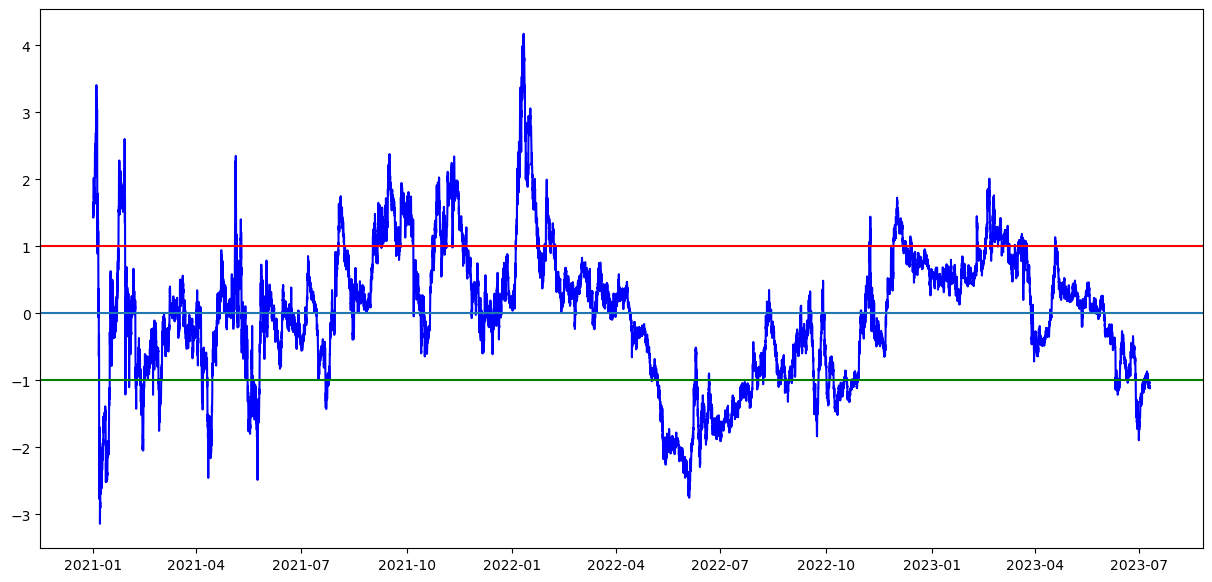

In [34]:
plt.figure(figsize=(15,7))

plt.plot(zscore(ratios).index, zscore(ratios), color='blue')
plt.axhline(zscore(ratios).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.show()

In [35]:
# expect z-score to oscillate around the mean

In [161]:
# Trade using a simple strategy WITH NO INVENTORY
def trade(P1, P2, near, far):

    # If window length is 0, algorithm doesn't make sense, so exit
    if (near == 0) or (far == 0) or (near >= far):
        return 0
    
    # Select prices to use: train or test data

#     print('Trade on Training Data')
#     print('\n')
    price1 = df_final_time_series[P1]
    price2 = df_final_time_series[P2]
    
    # Compute rolling mean and rolling standard deviation
    # Trading signals for execution
    ratios = price1/price2
    ma1 = ratios.rolling(window=near, center=False).mean()
    ma2 = ratios.rolling(window=far, center=False).mean()
    std = ratios.rolling(window=far, center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    drawdown = 0
    
    # Logging all transactions for validation
    transactions = []
    
    def logTxn(datetime, action1, coin1, price1, qty1,
               action2, coin2, price2, qty2, zscore, hedgeratio, pnl, drawdown=0, holdingperiod=timedelta(0)):
        
        txn = {}
        txn['datetime'] = datetime
        txn['action1'] = action1
        txn['coin1'] = coin1
        txn['price1'] = price1
        txn['qty1'] = qty1
        txn['action2'] = action2
        txn['coin2'] = coin2
        txn['price2'] = price2
        txn['qty2'] = qty2
        txn['zscore'] = zscore
        txn['hedgeratio'] = hedgeratio
        txn['pnl'] = pnl
        txn['drawdown'] = drawdown
        txn['holdingperiod'] = holdingperiod
        
        return txn
    
    # Simulate trading
    # Period by period
    # Trade on trading signals derived based on information only available at the point in time
    
    trades = 0
    
    for i in range(len(ratios)):

        # Sell short if the z-score is > 1 and when there is no existing position
        if (zscore[i] > 1.5) & (countS1 == 0) & (countS2 == 0):
            trades += 1
            money += price1[i] - price2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            
            opendatetime = ratios.index[i]
            
            transactions.append(
                logTxn(opendatetime, 
                       'Sell', P1, price1[i], countS1,
                       'Buy', P2, price2[i], countS2, 
                       zscore[i], ratios[i], money)
            )
                            
        # Buy long if the z-score is < 1 and when there is no existing position
        elif (zscore[i] < -1.5) & (countS1 == 0) & (countS2 == 0):
            trades += 1
            money -= price1[i] - price2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]

            opendatetime = ratios.index[i]

            transactions.append(
                logTxn(opendatetime, 
                       'Buy', P1, price1[i], countS1,
                       'Sell', P2, price2[i], countS2, 
                       zscore[i], ratios[i], money)
            )
            
        # Close all positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75 and ((countS1 != 0) or (countS2 != 0)):
            trades += 1
            money += price1[i] * countS1 + price2[i] * countS2

            closedatetime = ratios.index[i]
            holdingperiod = closedatetime - opendatetime

            transactions.append(
                logTxn(closedatetime, 
                       'Close', P1, price1[i], countS1,
                       'Close', P2, price2[i], countS2, 
                       zscore[i], ratios[i], money, min(money, drawdown), holdingperiod)
            )
            
            countS1 = 0
            countS2 = 0
            drawdown = 0
            
        # Keeps track of maximum drawdown when there are existing positions
        else:            
            drawdown = min(price1[i] * countS1 + price2[i] * countS2, drawdown)
            
            
    return transactions

In [90]:
# Trade using a simple strategy WITH INVENTORY
def trade(P1, P2, near, far):

    # If window length is 0, algorithm doesn't make sense, so exit
    if (near == 0) or (far == 0) or (near >= far):
        return 0
    
    # Select prices to use: train or test data

#     print('Trade on Training Data')
#     print('\n')
    price1 = df_final_time_series[P1]
    price2 = df_final_time_series[P2]
    
    # Compute rolling mean and rolling standard deviation
    # Trading signals for execution
    ratios = price1/price2
    ma1 = ratios.rolling(window=near, center=False).mean()
    ma2 = ratios.rolling(window=far, center=False).mean()
    std = ratios.rolling(window=far, center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    drawdown = 0
    
    # Logging all transactions for validation
    transactions = []
    
    def logTxn(datetime, action1, coin1, price1, qty1,
               action2, coin2, price2, qty2, zscore, hedgeratio, pnl, drawdown=0, holdingperiod=timedelta(0)):
        
        txn = {}
        txn['datetime'] = datetime
        txn['action1'] = action1
        txn['coin1'] = coin1
        txn['price1'] = price1
        txn['qty1'] = qty1
        txn['action2'] = action2
        txn['coin2'] = coin2
        txn['price2'] = price2
        txn['qty2'] = qty2
        txn['zscore'] = zscore
        txn['hedgeratio'] = hedgeratio
        txn['pnl'] = pnl
        txn['drawdown'] = drawdown
        txn['holdingperiod'] = holdingperiod
        
        return txn
    
    # Simulate trading
    # Period by period
    # Trade on trading signals derived based on information only available at the point in time
    
    trades = 0
    
    for i in range(len(ratios)):

        # Sell short if the z-score is > 1
        if (zscore[i] > 1.5):
            money += price1[i] - price2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            
            opendatetime = ratios.index[i]
            
            transactions.append(
                logTxn(opendatetime, 
                       'Sell', P1, price1[i], countS1,
                       'Buy', P2, price2[i], countS2, 
                       zscore[i], ratios[i], money)
            )
                            
        # Buy long if the z-score is < 1 
        elif (zscore[i] < -1.5):
            money -= price1[i] - price2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]

            opendatetime = ratios.index[i]

            transactions.append(
                logTxn(opendatetime, 
                       'Buy', P1, price1[i], countS1,
                       'Sell', P2, price2[i], countS2, 
                       zscore[i], ratios[i], money)
            )
            
        # Close all positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75 and ((countS1 != 0) or (countS2 != 0)):
            money += price1[i] * countS1 + price2[i] * countS2

            closedatetime = ratios.index[i]
            holdingperiod = closedatetime - opendatetime

            transactions.append(
                logTxn(closedatetime, 
                       'Close', P1, price1[i], countS1,
                       'Close', P2, price2[i], countS2, 
                       zscore[i], ratios[i], money, min(money, drawdown), holdingperiod)
            )
            
            countS1 = 0
            countS2 = 0
            drawdown = 0
            
        # Keeps track of maximum drawdown when there are existing positions
        else:            
            drawdown = min(price1[i] * countS1 + price2[i] * countS2, drawdown)
            
    if countS1 != 0 or countS2 != 0:
        money = money + price1[-1] * countS1 + price2[-1] * countS2
        transactions.append(
        logTxn(opendatetime, 
                       'End', P1, price1[i], countS1,
                       'End', P2, price2[i], countS2, 
                       zscore[i], ratios[i], money)
        )
    
    return transactions

In [162]:
def showResults(txn):
    
    txn = pd.DataFrame.from_dict(txn)
    txn = txn[['datetime', 'action1', 'coin1', 'price1', 'qty1',
               'action2', 'coin2', 'price2', 'qty2', 
               'zscore', 'hedgeratio', 'pnl', 'drawdown', 'holdingperiod']]
    txn = txn.set_index('datetime')    
    
    plt.figure(figsize=(15,7))
    plt.plot(txn.pnl.index, txn.pnl)    

    ax = plt.gca()
    formatter = DateFormatter("%Y-%m")
    ax.xaxis.set_major_formatter(formatter)
    locator = MonthLocator()
    ax.xaxis.set_major_locator(locator)    
    
    plt.show()

    print('Profit/Loss: {:.2f}'.format(txn.iloc[-1].pnl))
    print('Maximum Drawdown: {:.2f}'.format(min(txn.drawdown)))
    print('Maximum Holding Period: {}'.format(max(txn.holdingperiod)))
    
    return txn

In [163]:
near = list(range(5,15,1))
far = list(range(50,90,1))

combine = [near,far]
params = list(itertools.product(*combine)) 

search_results = []

for param in notebook.tqdm(params):
    result = {}
    txn = trade(P1, P2, param[0], param[1])
    
    txn = pd.DataFrame.from_dict(txn)
    txn = txn[['datetime', 'action1', 'coin1', 'price1', 'qty1',
               'action2', 'coin2', 'price2', 'qty2', 
               'zscore', 'hedgeratio', 'pnl', 'drawdown', 'holdingperiod']]
    txn = txn.set_index('datetime')    

    result['parameter'] = param
    result['PnL'] = txn.iloc[-1].pnl
    result['max_drawdown'] = min(txn.drawdown)
    result['score'] = result['PnL']/abs(result['max_drawdown'])
    
    search_results.append(result)

  0%|          | 0/400 [00:00<?, ?it/s]

Best Parameters: Near: 13, Far: 76


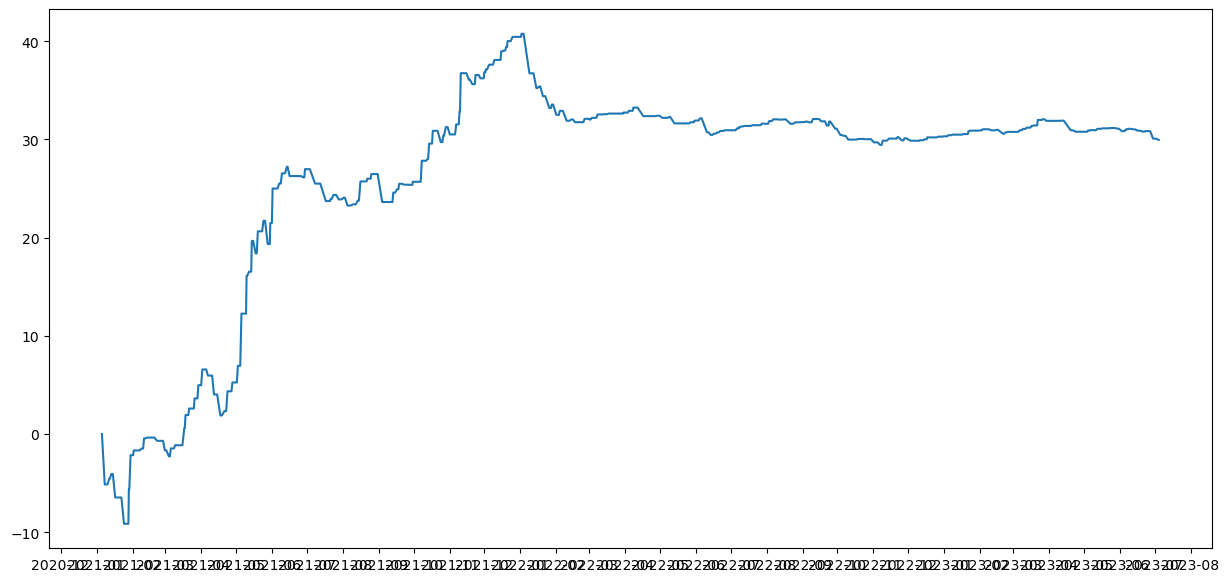

Profit/Loss: 29.96
Maximum Drawdown: -11.30
Maximum Holding Period: 6 days 00:00:00


In [164]:
best = pd.DataFrame(search_results).sort_values('score', ascending=False).reset_index().parameter[0]
print('Best Parameters: Near: {}, Far: {}'.format(best[0], best[1]))
txn = trade(P1, P2, best[0], best[1])
train_results = showResults(txn)

# Near: 13, Far: 76 (no inven)
# 

In [165]:
txn


[{'datetime': Timestamp('2021-01-05 16:00:00'),
  'action1': 'Buy',
  'coin1': 'LINK',
  'price1': 14.613,
  'qty1': 1,
  'action2': 'Sell',
  'coin2': 'XLM',
  'price2': 0.20334,
  'qty2': -71.86485688993804,
  'zscore': -1.5071518045201906,
  'hedgeratio': 71.86485688993804,
  'pnl': 0.0,
  'drawdown': 0,
  'holdingperiod': datetime.timedelta(0)},
 {'datetime': Timestamp('2021-01-08 02:00:00'),
  'action1': 'Close',
  'coin1': 'LINK',
  'price1': 14.6501,
  'qty1': 1,
  'action2': 'Close',
  'coin2': 'XLM',
  'price2': 0.27518,
  'qty2': -71.86485688993804,
  'zscore': -0.7373991350641528,
  'hedgeratio': 53.23824405843448,
  'pnl': -5.125671318973149,
  'drawdown': -11.302759840660965,
  'holdingperiod': Timedelta('2 days 10:00:00')},
 {'datetime': Timestamp('2021-01-10 10:00:00'),
  'action1': 'Sell',
  'coin1': 'LINK',
  'price1': 17.3335,
  'qty1': -1,
  'action2': 'Buy',
  'coin2': 'XLM',
  'price2': 0.30432,
  'qty2': 56.95813617245006,
  'zscore': 1.5366537825177153,
  'hedger

In [166]:
train_results

action1 coin1   price1  qty1 action2 coin2   price2  \
datetime                                                                  
2021-01-05 16:00:00     Buy  LINK  14.6130     1    Sell   XLM  0.20334   
2021-01-08 02:00:00   Close  LINK  14.6501     1   Close   XLM  0.27518   
2021-01-10 10:00:00    Sell  LINK  17.3335    -1     Buy   XLM  0.30432   
2021-01-12 00:00:00   Close  LINK  14.3552    -1   Close   XLM  0.26248   
2021-01-12 11:00:00     Buy  LINK  14.9008     1    Sell   XLM  0.28786   
...                     ...   ...      ...   ...     ...   ...      ...   
2023-06-25 21:00:00   Close  LINK   6.1220    -1   Close   XLM  0.09160   
2023-06-27 05:00:00     Buy  LINK   6.1490     1    Sell   XLM  0.09340   
2023-06-29 18:00:00   Close  LINK   5.9530     1   Close   XLM  0.10200   
2023-07-02 02:00:00    Sell  LINK   6.4450    -1     Buy   XLM  0.10600   
2023-07-04 15:00:00   Close  LINK   6.5010    -1   Close   XLM  0.10480   

                          qty2    zscore  hedgeratio        pnl   drawdown  \
datetime                                                                     
2021-01-05 16:00:00 -71.864857 -1.507152   71.864857   0.000000   0.000000   
2021-01-08 02:00:00 -71.864857 -0.737399   53.238244  -5.125671 -11.302760   
2021-01-10 10:00:00  56.958136  1.536654   56.958136  -5.125671   0.000000   
2021-01-12 00:00:00  56.958136  0.719681   54.690643  -4.530500  -4.530500   
2021-01-12 11:00:00 -51.764052 -1.612718   51.764052  -4.530500   0.000000   
...                        ...       ...         ...        ...        ...   
2023-06-25 21:00:00  66.791383  0.638619   66.834061  30.850667  -0.224230   
2023-06-27 05:00:00 -65.835118 -1.528905   65.835118  30.850667   0.000000   
2023-06-29 18:00:00 -65.835118 -0.711361   58.362745  30.088485  -0.993269   
2023-07-02 02:00:00  60.801887  1.509864   60.801887  30.088485   0.000000   
2023-07-04 15:00:00  60.801887  0.732946   62.032443  29.959522  -0.213722   

                      holdingperiod  
datetime                             
2021-01-05 16:00:00 0 days 00:00:00  
2021-01-08 02:00:00 2 days 10:00:00  
2021-01-10 10:00:00 0 days 00:00:00  
2021-01-12 00:00:00 1 days 14:00:00  
2021-01-12 11:00:00 0 days 00:00:00  
...                             ...  
2023-06-25 21:00:00 2 days 07:00:00  
2023-06-27 05:00:00 0 days 00:00:00  
2023-06-29 18:00:00 2 days 13:00:00  
2023-07-02 02:00:00 0 days 00:00:00  
2023-07-04 15:00:00 2 days 13:00:00  

[420 rows x 13 columns]

## MA Visualization

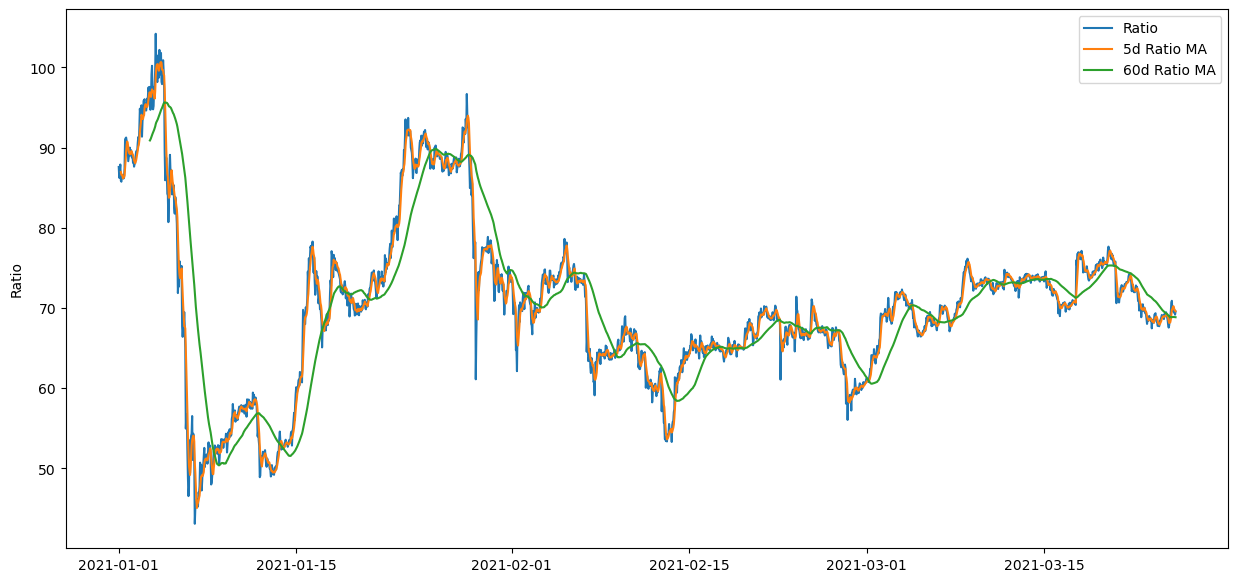

In [41]:
%matplotlib inline

zoom = 2000
ratios_mavg5 = ratios.head(zoom).rolling(window=5, center=False).mean()
ratios_mavg60 = ratios.head(zoom).rolling(window=60, center=False).mean()
std_60 = ratios.head(zoom).rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60

plt.figure(figsize=(15,7))
plt.plot(ratios.head(zoom).index, ratios.head(zoom).values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio','5d Ratio MA', '60d Ratio MA'])
plt.ylabel('Ratio')
plt.show()

# Repeat for shorter duration

In [179]:
def get_historical_price_5m(symbol):
    client = Client(config.binance_api_key_usdm_read, config.binance_secret_key_usdm_read)
    # set the time interval
    interval = Client.KLINE_INTERVAL_5MINUTE
    klines = client.get_historical_klines(symbol, interval, "1 Jan, 2023")
    df = pd.DataFrame(klines, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
    df = df[['timestamp', 'open', 'high', 'low', 'close', 'volume']]
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    df['close'] = pd.to_numeric(df['close'])
    df = df.dropna()
    
    return df

def get_final_price_series_5m(symbol_list):
    final_list = []
    
    # Use BTCUSDT as benchmark to store see what the length of the timeseries should be
    df_btc = get_historical_price_5m('BTCUSDT')
    benchmark_length = len(df_btc)
    print(benchmark_length)
    for symbol in symbol_list:
        print(symbol)
        try:
            df = get_historical_price_5m(symbol+'USDT')
            time.sleep(5)
            if len(df) != benchmark_length:
                pass
            else:
                df_close = df[['close']]
                df_close.rename(columns = {'close':f'{symbol}'}, inplace=True)
                final_list.append(df_close)
#                 print(final_list)
        except Exception as e:
            print(e)
    return final_list

In [180]:
top_pair_5m = get_final_price_series_5m(['XLM', 'LINK'])

55096
XLM
[                        XLM
timestamp                  
2023-01-01 00:00:00  0.0710
2023-01-01 00:05:00  0.0709
2023-01-01 00:10:00  0.0709
2023-01-01 00:15:00  0.0710
2023-01-01 00:20:00  0.0709
...                     ...
2023-07-11 08:15:00  0.1006
2023-07-11 08:20:00  0.1007
2023-07-11 08:25:00  0.1007
2023-07-11 08:30:00  0.1006
2023-07-11 08:35:00  0.1007

[55096 rows x 1 columns]]
LINK
[                        XLM
timestamp                  
2023-01-01 00:00:00  0.0710
2023-01-01 00:05:00  0.0709
2023-01-01 00:10:00  0.0709
2023-01-01 00:15:00  0.0710
2023-01-01 00:20:00  0.0709
...                     ...
2023-07-11 08:15:00  0.1006
2023-07-11 08:20:00  0.1007
2023-07-11 08:25:00  0.1007
2023-07-11 08:30:00  0.1006
2023-07-11 08:35:00  0.1007

[55096 rows x 1 columns],                       LINK
timestamp                 
2023-01-01 00:00:00  5.574
2023-01-01 00:05:00  5.565
2023-01-01 00:10:00  5.555
2023-01-01 00:15:00  5.559
2023-01-01 00:20:00  5.557
...         

In [181]:
df_top_5m = pd.concat(top_pair_5m ,axis=1)
df_top_5m

XLM   LINK
timestamp                         
2023-01-01 00:00:00  0.0710  5.574
2023-01-01 00:05:00  0.0709  5.565
2023-01-01 00:10:00  0.0709  5.555
2023-01-01 00:15:00  0.0710  5.559
2023-01-01 00:20:00  0.0709  5.557
...                     ...    ...
2023-07-11 08:15:00  0.1006  6.197
2023-07-11 08:20:00  0.1007  6.195
2023-07-11 08:25:00  0.1007  6.209
2023-07-11 08:30:00  0.1006  6.201
2023-07-11 08:35:00  0.1007  6.202

[55096 rows x 2 columns]

In [185]:
ratios_5m = df_top_5m['LINK']/df_top_5m['XLM']
ratios_5m

timestamp
2023-01-01 00:00:00    78.507042
2023-01-01 00:05:00    78.490832
2023-01-01 00:10:00    78.349788
2023-01-01 00:15:00    78.295775
2023-01-01 00:20:00    78.377997
                         ...    
2023-07-11 08:15:00    61.600398
2023-07-11 08:20:00    61.519364
2023-07-11 08:25:00    61.658391
2023-07-11 08:30:00    61.640159
2023-07-11 08:35:00    61.588878
Length: 55096, dtype: float64

In [187]:
print(genextreme.fit(ratios_5m))
genextreme.ppf(0.95, 2.6949618964524626, loc=89.16093794673114, scale=5.431783669909832)

(2.6949618964524626, 89.16093794673114, 5.431783669909832)


91.1757975305528

In [188]:
# Trade using a simple strategy WITH INVENTORY
def trade(P1, P2, near, far):

    # If window length is 0, algorithm doesn't make sense, so exit
    if (near == 0) or (far == 0) or (near >= far):
        return 0
    
    # Select prices to use: train or test data

#     print('Trade on Training Data')
#     print('\n')
    price1 = df_final_time_series[P1]
    price2 = df_final_time_series[P2]
    
    # Compute rolling mean and rolling standard deviation
    # Trading signals for execution
    ratios = price1/price2
    
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    drawdown = 0
    
    upper_thresh = genextreme.ppf(0.95, 2.6949618964524626, loc=89.16093794673114, scale=5.431783669909832)
    lower_thresh = genextreme.ppf(0.05, 2.6949618964524626, loc=89.16093794673114, scale=5.431783669909832)
    close_thresh = genextreme.ppf(0.75, 2.6949618964524626, loc=89.16093794673114, scale=5.431783669909832)
    
    # Logging all transactions for validation
    transactions = []
    
    def logTxn(datetime, action1, coin1, price1, qty1,
               action2, coin2, price2, qty2, hedgeratio, pnl, drawdown=0, holdingperiod=timedelta(0)):
        
        txn = {}
        txn['datetime'] = datetime
        txn['action1'] = action1
        txn['coin1'] = coin1
        txn['price1'] = price1
        txn['qty1'] = qty1
        txn['action2'] = action2
        txn['coin2'] = coin2
        txn['price2'] = price2
        txn['qty2'] = qty2
        txn['hedgeratio'] = hedgeratio
        txn['pnl'] = pnl
        txn['drawdown'] = drawdown
        txn['holdingperiod'] = holdingperiod
        
        return txn
    
    # Simulate trading
    # Period by period
    # Trade on trading signals derived based on information only available at the point in time
    
    trades = 0
    
    for i in range(len(ratios)):

        # Sell short if the z-score is > 1
        if ((ratios[i] > upper_thresh) & (countS1 == 0) & (countS2 == 0)):
            money += price1[i] - price2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            
            opendatetime = ratios.index[i]
            
            transactions.append(
                logTxn(opendatetime, 
                       'Sell', P1, price1[i], countS1,
                       'Buy', P2, price2[i], countS2, 
                        ratios[i], money)
            )
                            
        # Buy long if the ratio is above the 95th percentile
        elif ((ratios[i] < lower_thresh) & (countS1 == 0) & (countS2 == 0)):
            money -= price1[i] - price2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]

            opendatetime = ratios.index[i]

            transactions.append(
                logTxn(opendatetime, 
                       'Buy', P1, price1[i], countS1,
                       'Sell', P2, price2[i], countS2, 
                       ratios[i], money)
            )
            
        # Close all positions if the ratio is below 5th percentile
        elif abs(ratios[i]) < close_thresh and ((countS1 != 0) or (countS2 != 0)):
            money += price1[i] * countS1 + price2[i] * countS2

            closedatetime = ratios.index[i]
            holdingperiod = closedatetime - opendatetime

            transactions.append(
                logTxn(closedatetime, 
                       'Close', P1, price1[i], countS1,
                       'Close', P2, price2[i], countS2, 
                       ratios[i], money, min(money, drawdown), holdingperiod)
            )
            
            countS1 = 0
            countS2 = 0
            drawdown = 0
            
        # Keeps track of maximum drawdown when there are existing positions
        else:            
            drawdown = min(price1[i] * countS1 + price2[i] * countS2, drawdown)
            
    if countS1 != 0 or countS2 != 0:
        money = money + price1[-1] * countS1 + price2[-1] * countS2
        transactions.append(
        logTxn(opendatetime, 
                       'End', P1, price1[i], countS1,
                       'End', P2, price2[i], countS2, 
                       ratios[i], money)
        )
    
    return transactions

In [192]:
def showResults(txn):
    
    txn = pd.DataFrame.from_dict(txn)
    txn = txn[['datetime', 'action1', 'coin1', 'price1', 'qty1',
               'action2', 'coin2', 'price2', 'qty2', 
                'hedgeratio', 'pnl', 'drawdown', 'holdingperiod']]
    txn = txn.set_index('datetime')    
    
    plt.figure(figsize=(15,7))
    plt.plot(txn.pnl.index, txn.pnl)    

    ax = plt.gca()
    formatter = DateFormatter("%Y-%m")
    ax.xaxis.set_major_formatter(formatter)
    locator = MonthLocator()
    ax.xaxis.set_major_locator(locator)  
    ax.tick_params(axis='x', rotation=45)
    
    plt.show()

    print('Profit/Loss: {:.2f}'.format(txn.iloc[-1].pnl))
    print('Maximum Drawdown: {:.2f}'.format(min(txn.drawdown)))
    print('Maximum Holding Period: {}'.format(max(txn.holdingperiod)))
    
    return txn

In [190]:
# Trade with t score

near = list(range(5,15,1))
far = list(range(50,90,1))

combine = [near,far]
params = list(itertools.product(*combine)) 

search_results = []

for param in notebook.tqdm(params):
    result = {}
    txn = trade(P1, P2, param[0], param[1])
    
    txn = pd.DataFrame.from_dict(txn)
    txn = txn[['datetime', 'action1', 'coin1', 'price1', 'qty1',
               'action2', 'coin2', 'price2', 'qty2', 
               'hedgeratio', 'pnl', 'drawdown', 'holdingperiod']]
    txn = txn.set_index('datetime')    

    result['parameter'] = param
    result['PnL'] = txn.iloc[-1].pnl
    result['max_drawdown'] = min(txn.drawdown)
    result['score'] = result['PnL']/abs(result['max_drawdown'])
    
    search_results.append(result)

  0%|          | 0/400 [00:00<?, ?it/s]

Best Parameters: Near: 5, Far: 50


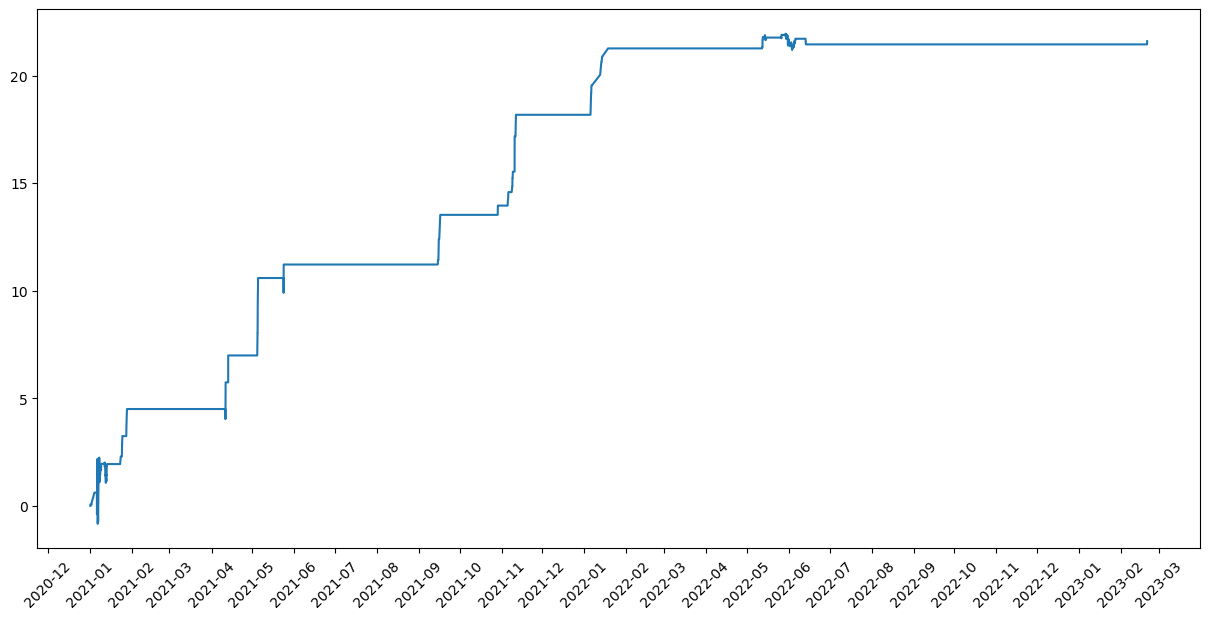

Profit/Loss: 21.60
Maximum Drawdown: -4.68
Maximum Holding Period: 6 days 00:00:00


In [193]:
best = pd.DataFrame(search_results).sort_values('score', ascending=False).reset_index().parameter[0]
print('Best Parameters: Near: {}, Far: {}'.format(best[0], best[1]))
txn = trade(P1, P2, best[0], best[1])
train_results = showResults(txn)

In [201]:
# Trade using a simple strategy WITH NO INVENTORY
def trade(P1, P2, near, far):

    # If window length is 0, algorithm doesn't make sense, so exit
    if (near == 0) or (far == 0) or (near >= far):
        return 0
    
    # Select prices to use: train or test data

#     print('Trade on Training Data')
#     print('\n')
    price1 = df_top_5m[P1]
    price2 = df_top_5m[P2]
    
    # Compute rolling mean and rolling standard deviation
    # Trading signals for execution
    ratios = price1/price2
    ma1 = ratios.rolling(window=near, center=False).mean()
    ma2 = ratios.rolling(window=far, center=False).mean()
    std = ratios.rolling(window=far, center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    drawdown = 0
    
    # Logging all transactions for validation
    transactions = []
    
    def logTxn(datetime, action1, coin1, price1, qty1,
               action2, coin2, price2, qty2, zscore, hedgeratio, pnl, drawdown=0, holdingperiod=timedelta(0)):
        
        txn = {}
        txn['datetime'] = datetime
        txn['action1'] = action1
        txn['coin1'] = coin1
        txn['price1'] = price1
        txn['qty1'] = qty1
        txn['action2'] = action2
        txn['coin2'] = coin2
        txn['price2'] = price2
        txn['qty2'] = qty2
        txn['zscore'] = zscore
        txn['hedgeratio'] = hedgeratio
        txn['pnl'] = pnl
        txn['drawdown'] = drawdown
        txn['holdingperiod'] = holdingperiod
        
        return txn
    
    # Simulate trading
    # Period by period
    # Trade on trading signals derived based on information only available at the point in time
    
    trades = 0
    
    for i in range(len(ratios)):

        # Sell short if the z-score is > 1 and when there is no existing position
        if (zscore[i] > 1.5) & (countS1 == 0) & (countS2 == 0):
            trades += 1
            money += price1[i] - price2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            
            opendatetime = ratios.index[i]
            
            transactions.append(
                logTxn(opendatetime, 
                       'Sell', P1, price1[i], countS1,
                       'Buy', P2, price2[i], countS2, 
                       zscore[i], ratios[i], money)
            )
                            
        # Buy long if the z-score is < 1 and when there is no existing position
        elif (zscore[i] < -1.5) & (countS1 == 0) & (countS2 == 0):
            trades += 1
            money -= price1[i] - price2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]

            opendatetime = ratios.index[i]

            transactions.append(
                logTxn(opendatetime, 
                       'Buy', P1, price1[i], countS1,
                       'Sell', P2, price2[i], countS2, 
                       zscore[i], ratios[i], money)
            )
            
        # Close all positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75 and ((countS1 != 0) or (countS2 != 0)):
            trades += 1
            money += price1[i] * countS1 + price2[i] * countS2

            closedatetime = ratios.index[i]
            holdingperiod = closedatetime - opendatetime

            transactions.append(
                logTxn(closedatetime, 
                       'Close', P1, price1[i], countS1,
                       'Close', P2, price2[i], countS2, 
                       zscore[i], ratios[i], money, min(money, drawdown), holdingperiod)
            )
            
            countS1 = 0
            countS2 = 0
            drawdown = 0
            
        # Keeps track of maximum drawdown when there are existing positions
        else:            
            drawdown = min(price1[i] * countS1 + price2[i] * countS2, drawdown)
            
            
    return transactions


def showResults(txn):
    
    txn = pd.DataFrame.from_dict(txn)
    txn = txn[['datetime', 'action1', 'coin1', 'price1', 'qty1',
               'action2', 'coin2', 'price2', 'qty2', 
               'zscore', 'hedgeratio', 'pnl', 'drawdown', 'holdingperiod']]
    txn = txn.set_index('datetime')    
    
    plt.figure(figsize=(15,7))
    plt.plot(txn.pnl.index, txn.pnl)    

    ax = plt.gca()
    formatter = DateFormatter("%Y-%m")
    ax.xaxis.set_major_formatter(formatter)
    locator = MonthLocator()
    ax.xaxis.set_major_locator(locator)    
    
    plt.show()

    print('Profit/Loss: {:.2f}'.format(txn.iloc[-1].pnl))
    print('Maximum Drawdown: {:.2f}'.format(min(txn.drawdown)))
    print('Maximum Holding Period: {}'.format(max(txn.holdingperiod)))
    
    return txn

In [202]:
near = list(range(5,15,1))
far = list(range(50,90,1))

combine = [near,far]
params = list(itertools.product(*combine)) 

search_results = []

for param in notebook.tqdm(params):
    result = {}
    txn = trade(P1, P2, param[0], param[1])
    
    txn = pd.DataFrame.from_dict(txn)
    txn = txn[['datetime', 'action1', 'coin1', 'price1', 'qty1',
               'action2', 'coin2', 'price2', 'qty2', 
               'zscore', 'hedgeratio', 'pnl', 'drawdown', 'holdingperiod']]
    txn = txn.set_index('datetime')    

    result['parameter'] = param
    result['PnL'] = txn.iloc[-1].pnl
    result['max_drawdown'] = min(txn.drawdown)
    result['score'] = result['PnL']/abs(result['max_drawdown'])
    
    search_results.append(result)

  0%|          | 0/400 [00:00<?, ?it/s]

Best Parameters: Near: 11, Far: 65


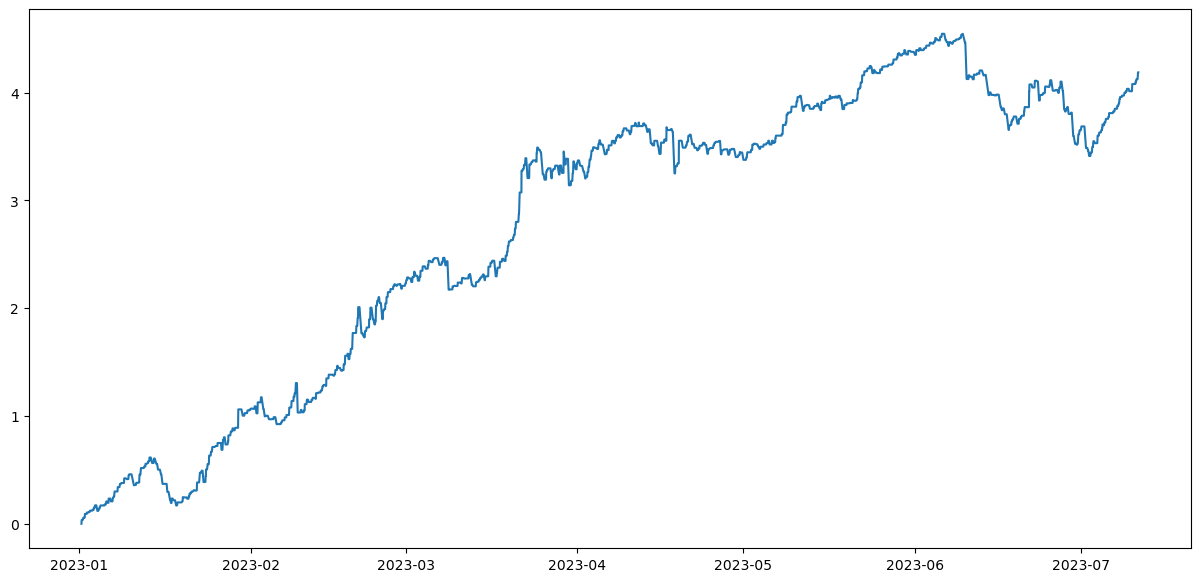

Profit/Loss: 4.19
Maximum Drawdown: -0.46
Maximum Holding Period: 0 days 12:30:00


In [203]:
best = pd.DataFrame(search_results).sort_values('score', ascending=False).reset_index().parameter[0]
print('Best Parameters: Near: {}, Far: {}'.format(best[0], best[1]))
txn = trade(P1, P2, best[0], best[1])
train_results = showResults(txn)

# Near: 13, Far: 76 (no inven)
# 